## Visualization of simulation data and comparison

In [23]:
### load module
%matplotlib inline

#import instaseis
import numpy as np
import matplotlib.pyplot as plt
# import h5py
import pandas as pd
import seissolxdmf 
import os, sys

import pyproj
# import scipy.io as sio
import matplotlib.tri as tri

import matplotlib as mpl

# colors2=sns.color_palette("rocket",8);
print('load modulus')

load modulus


In [34]:
# mpl.rcParams["savefig.bbox"]  ='tight'

# mpl.rcParams['legend.fontsize'] = 'large'
# mpl.rcParams['legend.title_fontsize'] = 'x-large'
# mpl.rcParams['figure.figsize'] = 6.4, 4.8

# mpl.rcParams['lines.linewidth'] = 2.5
# mpl.rcParams['lines.linestyle'] = '-'
# mpl.rcParams['savefig.format'] = 'png'
# mpl.rcParams['savefig.dpi'] = 400
# mpl.rcParams['savefig.transparent'] = False

# plt.rcParams['axes.grid'] = True       # Enable grid
# plt.rcParams['grid.linestyle'] = '--'   # Dashed gridlines
# plt.rcParams['grid.alpha'] = 0.6       # Transparency of gridlines

# mpl.style.use('seaborn-v0_8-paper') # Lovely plotting style

import matplotlib.pyplot as plt
import sys

# Add custom path
sys.path.insert(0, '/Users/DuoL/Documents/PythonPath')

# Option A: Use style file
plt.style.use('/Users/DuoL/Documents/PythonPath/custom_plot_style.mplstyle')

rootfolder = '/Users/DuoL/Documents/NSHM/Central/'



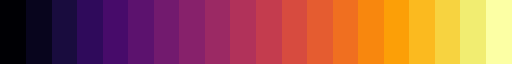

In [25]:
import palettable.matplotlib as cmapa
from palettable.cmocean import sequential as cmapb
from palettable.cmocean import diverging as cmapc

from matplotlib.colors import ListedColormap

Cmap1 = ListedColormap(cmapa.Inferno_20.mpl_colors)
Cmap1



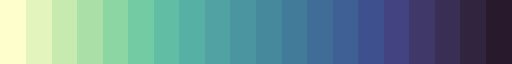

In [26]:
Cmap2 = ListedColormap(cmapb.Deep_20.mpl_colors)
Cmap2

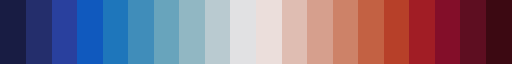

In [27]:

Cmap3 = ListedColormap(cmapc.Balance_20.mpl_colors)
Cmap3

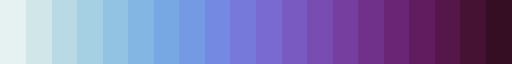

In [28]:
Cmap4 = ListedColormap(cmapb.Dense_20.mpl_colors)
Cmap4

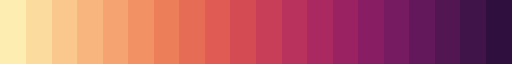

In [29]:
Cmap5 = ListedColormap(cmapb.Matter_20.mpl_colors)
Cmap5

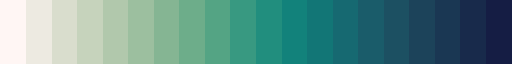

In [30]:
Cmap6 = ListedColormap(cmapb.Tempo_20.mpl_colors)
Cmap6

In [31]:
my_cmap = Cmap2(np.arange(12))
eng_map = ListedColormap(my_cmap)
# print(my_cmap)

In [11]:
# load contour data and plot

# from netCDF4 import Dataset

# fin = Dataset('mesh/alu_60_7.nc','r')
# print(fin)
# x = fin.variables['x'][:]
# y = fin.variables['y'][:]
# z = fin.variables['z'][:,:]

# xgrid,ygrid = np.meshgrid(x,y)
# # plt.figure()
# # plt.contour(xgrid,ygrid,z)

# lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
# myproj = pyproj.Proj(proj='geocent', init='EPSG:5936',ellps='WGS84', datum='WGS84')

# xxx = pyproj.transform(lla, myproj, xgrid,ygrid, xgrid, radians=False)

# fig,ax = plt.subplots(figsize=(4,3.5))
# plt.contour(xxx[0]/1e3,xxx[1]/1e3,z)

# ax.set_xlim(0.9e3, 1.8e3)
# ax.set_ylim(-2.5e3,-1.4e3)

print(4700/3600 * 512)


668.4444444444445


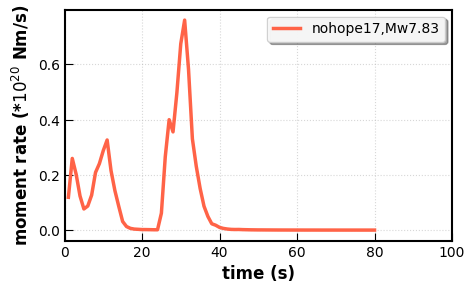

In [45]:
import importlib, DyPltFunc.plot_mt_energy
importlib.reload(DyPltFunc.plot_mt_energy)
from DyPltFunc.plot_mt_energy import plot_mt

modelname ='nohope17'
fig,axe = plot_mt(modelname=modelname)

plt.savefig(modelname+'ener.png',dpi=300)

In [46]:
# load surface static GPS displacement and compare
import pandas as pd
import matplotlib
from matplotlib.ticker import MultipleLocator
import pyproj
# print(matplotlib.style.available)

# matplotlib.rc('font', **font)
# matplotlib.style.use('seaborn-v0_8-talk') # Lovely plotting style

lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
myproj = pyproj.Proj( init='EPSG:2193',ellps='WGS84', datum='WGS84')


siteTable = pd.read_csv('/Users/DuoL/Documents/NSHM/Model_kinematic/site_subtable2.csv')
sx,sy = pyproj.transform(lla, myproj, siteTable['lon'],siteTable['lat'], radians=False)

siteTable['x']=sx
siteTable['y']=sy

siteTable.to_csv('siteTable_xy.csv')
figsize_single=(6,4.5)

/Users/DuoL/opt/miniconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/7n/hc17svy55_bfzb_y1r6qgry00000gp/T/ipykernel_59790/3545955934.py:16: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  sx,sy = pyproj.transform(lla, myproj, siteTable['lon'],siteTable['lat'], radians=False)


In [40]:

rootfolder = '/Users/DuoL/Documents/NSHM/Central/'
eventfile = pd.read_csv(rootfolder + 'eventlist_slab.csv')
print(eventfile.keys())
eventlist = eventfile['event']

plt.figure(figsize=(10,7))
ax0=plt.subplot(111)  


for ieve, eve in enumerate(eventlist[2::]):
    
    print(ieve, str(eve))

    if eve!='jp4b':

        energy_file2 = rootfolder + 'Joint4/energy/' + str(eve) + '-energy.csv'
        data3 = pd.read_csv(energy_file2)
        quality2 = data3.variable.unique()

        data_seis2 = data3[data3['variable']=='seismic_moment']
        seis2 = data_seis2['measurement'].to_numpy()
        time2 = data_seis2['time'].to_numpy()

        seis_rate2  = np.diff(seis2)/np.diff(time2)
        mag2  = 2/3*np.log10(seis2[-1]) - 6.07

        print(eve +':' + str(mag2))

        plt.plot(time2[1::],(seis_rate2)/1e20,'-',label = eve + ',Mw'+str(round(mag2,2)))   # from MPa*m**2/s to dyne-cm/s


plt.legend(loc=1,fontsize=8)
plt.xlabel('time (s)')
plt.ylabel('moment rate (*$10^{20}$ Nm/s)')
ax0.set(xlim=(0,80))
ax0.set(ylim=(0,20))
# plt.yscale('log')

plt.savefig( './' + 'slab-' +'-mag.png',dpi=300)
plt.close()

Index(['ids', 'event'], dtype='object')
0 jp4bC
jp4bC:8.981813584125252
1 jp4bD
jp4bD:8.881752601957785
2 jp4bE
jp4bE:-inf
3 jp4bF
jp4bF:8.832151618155338
4 jp4bFsurf
jp4bFsurf:8.832455696779856
5 jp4bG
jp4bG:8.710690475154841
6 jp4bH
jp4bH:8.483637666590342
7 jp4bH_att
jp4bH_att:8.481208317649905
8 jp4d
jp4d:8.48086558292836
9 jp4e
jp4e:8.39094203788543
10 jp4eAtt
jp4eAtt:8.397597421843344
11 jp4f
jp4f:8.324526701390234
12 jp4g
jp4g:8.327713071842703


/var/folders/7n/hc17svy55_bfzb_y1r6qgry00000gp/T/ipykernel_7908/1960495554.py:25: RuntimeWarning: divide by zero encountered in log10
  mag2  = 2/3*np.log10(seis2[-1]) - 6.07


jp3zBcEL,mag 8.314859694373098


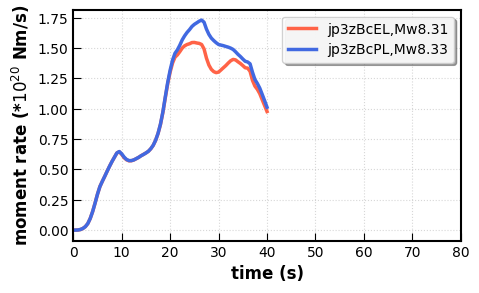

In [15]:
# plot moment rate and compare
%matplotlib inline

modelname = 'jp3zBcEL'
# modelname = 'test3r35TPd'
modelname2 = 'jp3zBcPL'


# modelname = 'welF400'
# modelname2 = 'welF400tap'


# foldername = './crustal/energy/'
# foldername2 = './crustal/energy/'
foldername = '../Central/Joint3/wai/'
# foldername = '/Users/DuoL/Documents/SeisSol/testTP/output/'

# foldername2 = '/Users/DuoL/Documents/SeisSol/testTP/output/'
# foldername = '/Users/DuoL/Documents/SeisSol/2021Alaska/jul24/'

energy_file = foldername +  modelname+'-energy.csv'
energy_file2 = foldername +  modelname2+'-energy.csv'

data2 = pd.read_csv(energy_file)
# print(data2)
quality = data2.variable.unique()
# print(quality)

data3 = pd.read_csv(energy_file2)
# print(data2)
quality2 = data3.variable.unique()
# print(quality)

data_seis = data2[data2['variable']=='seismic_moment']
seis = data_seis['measurement'].to_numpy()
time = data_seis['time'].to_numpy()

seis_rate  = np.diff(seis)/np.diff(time)
mag  = 2/3*np.log10(seis[-1])-6.07

data_seis2 = data3[data3['variable']=='seismic_moment']
seis2 = data_seis2['measurement'].to_numpy()
time2 = data_seis2['time'].to_numpy()

seis_rate2  = np.diff(seis2)/np.diff(time2)
mag2  = 2/3*np.log10(seis2[-1])-6.07

print(modelname + ',mag',mag)

plt.figure(figsize=(5,3))

ax0=plt.subplot(111)               
# plt.plot(enf[:,0],enf[:,1]*1e7/1e26,'-',color=colors2[4])   # from MPa*m**2/s to dyne-cm/s
plt.plot(time[1::],(seis_rate)/1e20,'-',color='tomato',label= modelname +',Mw'+str(round(mag,2)))   # from MPa*m**2/s to dyne-cm/s
plt.plot(time2[1::],(seis_rate2)/1e20,'-',color='royalblue',label = modelname2 + ',Mw'+str(round(mag2,2)))   # from MPa*m**2/s to dyne-cm/s

plt.legend(loc=1,fontsize=10)
plt.xlabel('time (s)')
plt.ylabel('moment rate (*$10^{20}$ Nm/s)')
ax0.set(xlim=(0,80))

# seismic moment magnitude
plt.savefig( './' + modelname + '-' + modelname2 +'-mag2.png',dpi=300)
plt.show()

Event file columns: Index(['ids', 'event'], dtype='object')
Processing 12 events
Processing event 1/12: welA
  Event: welA, Mw = 7.08
Processing event 2/12: welB
  Event: welB, Mw = 5.62
Processing event 3/12: welBb
  Event: welBb, Mw = 7.16
Processing event 4/12: welBbatt
  Event: welBbatt, Mw = 7.17
Processing event 5/12: welC
  Event: welC, Mw = 7.18
Processing event 6/12: welCatt
  Event: welCatt, Mw = 7.20
Processing event 7/12: welCb
  Event: welCb, Mw = 5.51
Processing event 8/12: welD
  Event: welD, Mw = 7.07
Processing event 9/12: welEa
  Event: welEa, Mw = 7.11
Processing event 10/12: welEb200
  Event: welEb200, Mw = 7.11
Processing event 11/12: welEbasin
  Event: welEbasin, Mw = 7.24
Processing event 12/12: welEbasinAtt
  Event: welEbasinAtt, Mw = 7.11
Figure saved to stf_comparison.png


(0.0, 50.0)

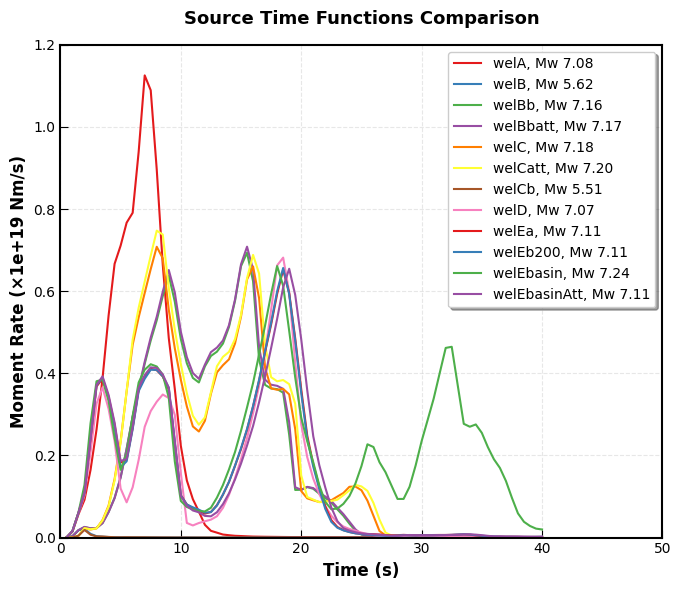

In [33]:
import DyPltFunc.plot_source, importlib
importlib.reload(DyPltFunc.plot_source)

from DyPltFunc.plot_source import (
    plot_stf_loop, plot_stf_and_moment, 
    load_energy_file, calculate_magnitude
)

# Multi-event comparison (improved original function)
fig, axe = plot_stf_loop(rootfolder+'eventlist.csv', 
                        energy_folder='/Users/DuoL/Documents/NSHM/Central/Joint4/energy/',m0scale=1e19,figsize=(7,6),
                        save_path='stf_comparison.png')

axe.set_ylim([0,1.2])
axe.set_xlim([0,50])

# Single event with both plots
# time, moment = load_energy_file('event1-energy.csv')
# mag = calculate_magnitude(moment[-1])
# fig, axes = plot_stf_and_moment(time, moment, mag, 
#                                  label='Event 1',
#                                  save_path='event1_complete.png')

In [ ]:
# Compuate between-event variability

rootfolder = '/Users/DuoL/Documents/NSHM/Central/'

modelname = 'jp4bHatt'
modelname2 = 'jp4bH'


gmfile = rootfolder + 'Joint4/GMs/'+ modelname +'-GM-dist.csv'
gmtable = pd.read_csv(gmfile)

gmfile2 = rootfolder + 'Joint4/GMs/'+ modelname2 +'-GM-dist.csv'
gmtable2 = pd.read_csv(gmfile2)


plt.figure(figsize=figsize_single)
# plt.plot(gmtable['arc_length']/1e3,gmtable['PGA']/9.8,'.k',label='PGA')
plt.plot(gmtable['arc_length']/1e3,gmtable['PGV'],'*r',label='PGV')
plt.plot(gmtable2['arc_length']/1e3,gmtable2['PGV'],'*b',label='PGV')


plt.xlim([1,100])
plt.ylim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.xlabel('distance (km)')
plt.ylabel('PGV (m/s)')
# plt.title('Mw: '+str(round(mag,2)))
plt.legend()

plt.savefig(modelname + '-gm.png',dpi=300)
plt.show()


In [ ]:
epi210= (1797500,5455000)
rot = (0.7660444431189779, -0.6427876096865395)
rot2 = (0.6427876096865395, 0.7660444431189779)
x1 = 2200000
y1 = -5150000

x = epi210[0]*rot[0] + epi210[1]*rot[1] + x1
y = epi210[0]*rot2[0] +epi210[1]*rot2[1]  + y1

print(x,y)

70558.47566629015 184183.16562557872


In [ ]:
from netCDF4 import Dataset
from FigFunc.find_fault_string import *

rootfolder = '/Users/DuoL/Documents/NSHM/Central/'

ncfile = rootfolder + '../Geometry/NZ_gebco_03sC.grd'

fnet = Dataset(ncfile,'r')
lon = fnet['lon']
lat = fnet['lat']
topo = fnet['z']


## load coastline data

# coastfile = rootfolder + '../Geometry/CoastNorth.txt.npy'
# coast =  np.load(coastfile)
# print(coast)

coastfile = rootfolder + '../Geometry/nzcoast_all.csv'
coast_table = pd.read_csv(coastfile)

# load Fault segment

folder = rootfolder + "../NSHM_SRM_Model/NZ_CFM_v1_0_shapefile/"
faultShp = os.path.join(folder, "NZ_CFM_v1_0.shp")

# central Aoteara faults
# fault2 = ['Wellington Hutt','Aotea','Whiteman']
fault2 = ['Wellington Hutt','Aotea','Wairarapa: Needles','Wairarapa: 2','Wairarapa: 1']
faultTable = find_fault_string(faultShp,fault2)
# print(faultTable.keys())

hikfile = rootfolder + '/slab_hik_edge.csv'
hik_trace  = pd.read_csv(hikfile)

# siteTable = pd.read_csv(rootfolder + '../Model_kinematic/site_subtable2.csv')
# print(siteTable.keys())


In [ ]:
# plot PGV
from FigFunc.load_surf_gm14 import load_surf_gm

epi300 = (1740500,5385000)
epi310 = (1797500,5455000)
epi230 = (1753000,5434000)
# epi240 = (1737000,5417000)

# modelname = 'welEa'
# modelname = 'welD'
# modelname = 'jp3zBc'

# mw 8.48
modelname = 'jp4bH'
modelname2 = 'jp4e'
modelname3 = 'jp4g'

# mw8.39
# modelname = 'jp4g'
# modelname2 = 'jp4f'


# modelname = 'welCatt'

xdmfFilename = rootfolder +'Joint4/GMs/' + modelname +'-GME-surface.xdmf'
xdmfFilename2 = rootfolder +'Joint4/GMs/' + modelname2 +'-GME-surface.xdmf'

# calculate variability for slab-interface ruptures

from FigFunc.calc_variability2 import load_gm_data_slab, calc_gm_variability

# load_gm_data for slab

pga,pgv,sa1_m1,sa3,depi,rjb1 = load_gm_data_slab(xdmfFilename)
rjb_bins1, mean_bins1, std_bins1 = calc_gm_variability(np.array(rjb1),np.array(sa1_m1),nbins=40)

pga,pgv,sa1_m2,sa3,depi,rjb1 = load_gm_data_slab(xdmfFilename2)
rjb_bins2, mean_bins2, std_bins2 = calc_gm_variability(np.array(rjb1),np.array(sa1_m2),nbins=40)


# sa1_all = np.array(sa1_m1)
# sa1_all.append(np.array(sa1_m2))
# sa1_all.append(np.array(sa1_m3))

# rjb_all = np.array(rjb1)
# rjb_all = rjb_all.append(np.array(rjb1))
# rjb_all = rjb_all.append(np.array(rjb1))

# slab interface rupture
# pga,pgv,sa1,sa3,triang,depi,rjb = load_surf_gm_slab(xdmfFilename,epi230)

# crustal fault rupture
# pga,pgv,sa1,sa3,sa0_3,triang,depi,rjb = load_surf_gm(xdmfFilename,epi230)


(419220, 3) (139740, 3)
(585624, 3) (195208, 3)


In [1]:
# between-event variability
# mw 8.48
# modelname = 'jp4bH'
# modelname2 = 'jp4e'
# modelname3 = 'jp4g'


# xdmfFilename = rootfolder +'Joint4/GMs/' + modelname +'-GME-surface.xdmf'
# xdmfFilename2 = rootfolder +'Joint4/GMs/' + modelname2 +'-GME-surface.xdmf'
xdmfFilename3 = rootfolder +'Joint4/GMs/' + modelname3 +'-GME-surface.xdmf'

# # for modelname1

# pga,pgv,sa1_m1,sa3,depi,rjb1 = load_gm_data(xdmfFilename)
# pga,pgv,sa1_m2,sa3,depi,rjb1 = load_gm_data(xdmfFilename2)
pga,pgv,sa1_m3,sa3,depi,rjb1 = load_gm_data(xdmfFilename3)


# rjb_bins1, mean_bins1, std_bins1 = calc_gm_variability(np.array(rjb1),np.array(sa1_m1),nbins=40)
# rjb_bins2, mean_bins2, std_bins2 = calc_gm_variability(np.array(rjb1),np.array(sa1_m2),nbins=40)
rjb_bins3, mean_bins3, std_bins3 = calc_gm_variability(np.array(rjb1),np.array(sa1_m3),nbins=40)


figsize_single = [5,3]

plt.figure(figsize=figsize_single)

siteid= int(34)
print('Rjb distance:',rjb_bins1[siteid])
plt.errorbar([8.48,8.39,8.32], [mean_bins1[siteid],mean_bins2[siteid],mean_bins3[siteid]], [std_bins1[siteid],std_bins2[siteid],std_bins3[siteid]], marker='s', mfc='red', ms=3, mew=0.1,label='simulation')


plt.ylabel('between-event uncertainty)')

# plt.xlim([1,100])
plt.ylim([-2,2])
# plt.xscale('log')
# plt.yscale('log')

plt.xlabel('Mw')

plt.legend(loc=1,fontsize=9)
plt.grid(linestyle='-',which='both',linewidth=0.7,c='lightgray')

plt.savefig( 'between-3e-' + '-uncertainty.png',dpi=300)
plt.close()


NameError: name 'rootfolder' is not defined

In [ ]:

# plot std and mean

figsize_single = [5,3]

plt.figure(figsize=figsize_single)

plt.errorbar(rjb_bins1[0:-1], mean_bins1, std_bins1, marker='s', mfc='red', ms=3, mew=0.1,label='simulation')

# plt.plot(rjb_bins1[0:-1], 10**mean_bins1/9.8,'-',c='royalblue',markersize=0.7,label='simulation mean')

plt.ylabel('within-event uncertainty)')

plt.xlim([1,100])
plt.ylim([-2,2])
plt.xscale('log')
# plt.yscale('log')

plt.xlabel('R_jb (km)')

plt.legend(loc=1,fontsize=9)
plt.grid(linestyle='-',which='both',linewidth=0.7,c='lightgray')

plt.savefig( modelname  + '-uncertainty.png',dpi=300)
plt.close()

In [92]:
# nbins = int(40)
# rjb_bins = np.logspace(0,2,nbins)

# mean_bins = np.zeros(nbins)
# std_bins = np.zeros(nbins)

# for ik, rjb_bin in enumerate(rjb_bins[0:-1]):
#     print(ik, rjb_bin)

#     mean_bins[ik] = np.mean(sa1[np.where((rjb/1e3 > rjb_bin)&(rjb/1e3 <rjb_bins[ik+1]))])
#     std_bins[ik]  = np.std(sa1[np.where((rjb/1e3 > rjb_bin)&(rjb/1e3 <rjb_bins[ik+1]))])

# print(mean_bins, std_bins)
# print(rjb_bins)

In [ ]:
# modelname = 'jp4d-fw'
# pvfile = rootfolder + 'Joint4/GMs/' + modelname+ '-select-GME.csv'
# pvdata= pd.read_csv(pvfile)

# p1 = (1800650.75,5504513.0)
# p2 = (1888556.30,5415316.55)
# p3 = (1767281.22,5312777.18)
# p4 = (1693832.38,5386412.84)

# rjb = []

# for i in range(len(pvdata['Points:0'])):
#     rjb.append(calc_rjb3D(pvdata['Points:0'][i],pvdata['Points:1'][i],p1,p2,p3,p4))

# sa1 = pvdata['SA01.000s']
# sa3 = pvdata['SA03.000s']


from FigFunc.plot_gme_curve_v77 import plot_gme_curve
# from FigFunc.plot_gme_curve_v8 import plot_gme_curve_atk22

from FigFunc.plot_gme_curve_v122 import plot_gme_curve_2d
from FigFunc.plot_gme_curve_mean_std_v20 import plot_gme_curve_mean_std

datafile = rootfolder + 'GMMs/Atkinson2022Crust_m72.csv'
gmTable = pd.read_csv(datafile)

# datafile = rootfolder + 'GMMs/sheet/atk22_mw8p32_sa1_v2.csv'
# gmTable = pd.read_csv(datafile)

# datafile2 = rootfolder + 'GMMs/sheet/ag20_mw8p32_sa1_v2.csv'
# gmTable2 = pd.read_csv(datafile2)

# # # # correct to Rjb

gmTable['r_rup'] =  gmTable['r_rup'] - 9.0  #np.sqrt(gmTable['r_rup']**2 - 9.0**2 ) rrup to r_jb

# gmTable['r_rup'] = gmTable['r_rup'] - 12.0
# gmTable2['r_rup'] = gmTable2['r_rup'] - 12.0

rjb = np.array(rjb)

# plot_gme_curve_mean_std(modelname, gmTable,rjb, sa1,sa3,sa0_3,figsize_single,imd='sa1')
# plot_gme_curve(modelname, gmTable,gmTable2,rjb, sa1,sa3,figsize_single,imd='sa1')

plot_gme_curve(modelname, gmTable,sa3,rjb, imd='sa3')
# plot_gme_curve(modelname, gmTable,sa0_3,rjb, imd='sa0_3')


In [24]:
from FigFunc.plotting_defs_v94 import  plot_gme_hik

# plot mapview of ground motions

# plot_gme_hik(pgv,sa1,sa3,triang,coast_table,hik_trace,faultTable,modelname, imd='sa1')
plot_gme_hik(pgv,sa1,sa3,triang,coast_table,hik_trace,faultTable,modelname, imd='pgv')

# plot_gme_crust(pgv,sa1,sa3,triang,coast_table,faultTable,modelname, imd='pgv')


plotting PGV


In [ ]:
# Rjb calculation and GME loading code for crustal and slab

def calc_rjb(x,y,p1=(1719988.,5407437.69),p2=(1783672.647,5452039.)):

    s = (x,y)
    t = ((s[0]-p1[0])*(p2[0]-p1[0])+ (s[1]-p1[1])*(p2[1]-p1[1]))/ ((p1[0]-p2[0])**2 + (p1[1]-p2[1])**2)

    if t < 0 :
        d = np.sqrt((s[0]-p1[0])**2 + (s[1]-p1[1])**2)
    else:
        if t>1 : 
            d = np.sqrt((s[0]-p2[0])**2 + (s[1]-p2[1])**2)
        else:
            c = (p1[0] + t*(p2[0]-p1[0]), p1[1] + t*(p2[1]-p1[1]))
            d = np.sqrt((s[0]-c[0])**2 + (s[1]-c[1])**2)

    return d

p1 = (1800650.75,5504513.0)
p2 = (1888556.30,5415316.55)
# p3 = (1750194.15,5330949.14)
p3 = (1767281.22,5312777.18)
p4 = (1693832.38,5386412.84)


def calc_rjb3D(x,y,p1=(1,1),p2=(1,2),p3=(2,2),p4=(2,1)):
    '''compute the shortest distance to the surfface projection of a fault plane'''

    s = (x,y)
    rjb = np.zeros(4)

    pxy = np.array([p1,p2,p3,p4]) # pxy is (4,2) in shape

    # check if s is inside the rectangle:

    i = 0

    t = ((s[0]-pxy[i,0])*(pxy[i+1,0]-pxy[i,0])+ (s[1]-pxy[i,1])*(pxy[i+1,1]-pxy[i,1]) )/ ((pxy[i,0]-pxy[i+1,0])**2 +(pxy[i+1,1]-pxy[i,1])**2)
    
    idd = 3

    q = ((s[0]-pxy[idd,0])*(pxy[0,0]-pxy[idd,0])+ (s[1]-pxy[idd,1])*(pxy[0,1]-pxy[idd,1]) )/ ((pxy[idd,0]-pxy[0,0])**2 +(pxy[idd,1]-pxy[0,1])**2)

    if (t>1 or t<0 or q<0 or q>1):

    # if not:

        for i in range(3):
            # print('line:',i)

            t = ((s[0]-pxy[i,0])*(pxy[i+1,0]-pxy[i,0])+ (s[1]-pxy[i,1])*(pxy[i+1,1]-pxy[i,1]) )/ ((pxy[i,0]-pxy[i+1,0])**2 +(pxy[i+1,1]-pxy[i,1])**2)

            if t < 0 :
                d = np.sqrt((s[0]-pxy[i,0])**2 + (s[1]-pxy[i,1])**2)
            else:
                if t>1 : 
                    d = np.sqrt((s[0]-pxy[i+1,0])**2 + (s[1]-pxy[i+1,1])**2)
                else:
                    c = (pxy[i,0] + t*(pxy[i+1,0]-pxy[i,0]), pxy[i,1] + t*(pxy[i+1,1]-pxy[i,1]))
                    d = np.sqrt((s[0]-c[0])**2 + (s[1]-c[1])**2)

            rjb[i] = d

        # print('line:',i+1)
        idd = i + 1

        t = ((s[0]-pxy[idd,0])*(pxy[0,0]-pxy[idd,0])+ (s[1]-pxy[idd,1])*(pxy[0,1]-pxy[idd,1]) )/ ((pxy[idd,0]-pxy[0,0])**2 +(pxy[idd,1]-pxy[0,1])**2)

        if t < 0 :
            d = np.sqrt((s[0]-pxy[idd,0])**2 + (s[1]-pxy[idd,1])**2)
        else:
            if t>1 : 
                d = np.sqrt((s[0]-pxy[0,0])**2 + (s[1]-pxy[0,1])**2)
            else:
                c = (pxy[idd,0] + t*(pxy[0,0]-pxy[idd,0]), pxy[idd,1] + t*(pxy[0,1]-pxy[idd,1]))
                d = np.sqrt((s[0]-c[0])**2 + (s[1]-c[1])**2)
        rjb[i+1] = d

        rjb_min = np.min(rjb)
        
    else: 
        rjb_min = 0

    return rjb_min

def load_surf_gm_slab(xdmfFilename,origin=(0,0)):
    '''
    the Rjb is calculated assuming the fault plane Ax+By+D=0

    '''
    p1 = (1800650.75,5504513.0)
    p2 = (1888556.30,5415316.55)
    p3 = (1767281.22,5312777.18)
    p4 = (1693832.38,5386412.84)

    sx = seissolxdmf.seissolxdmf(xdmfFilename)
    
    ndt = sx.ReadNdt()
    surfxyz = sx.ReadGeometry()
    connect = sx.ReadConnect()
    
    print(surfxyz.shape,connect.shape)
    
    centers = (surfxyz[connect[:,0]] + surfxyz[connect[:,1]] + surfxyz[connect[:,2]])/3.
    depi = np.sqrt( (centers[:,0]-origin[0])**2 + (centers[:,1]-origin[1])**2)
    
    Rjb = []

    for i in range(len(centers[:,1])):
        Rjb.append(calc_rjb3D(centers[i,0],centers[i,1],p1,p2,p3,p4))

    # print(surf.shape
    ############# load GMPEs data  ##############
    triang = tri.Triangulation(surfxyz[:,0],surfxyz[:,1],connect) # in longitude and latititude
    # triang = tri.Triangulation(surfxyz[:,0],surfxyz[:,1],connect) # in Cartesian xyz coords.
    
    ##%%
    pga = sx.ReadData('PGA')
    pgv = sx.ReadData('PGV')
    sa1 = sx.ReadData('SA01.000s')
    sa3 = sx.ReadData('SA03.000s')
    # sa0_3 = sx.ReadData('SA00.300s')
    
    return pga,pgv,sa1,sa3,triang,depi,Rjb
    


In [ ]:
# gmTable['r_rup'] = np.sqrt(gmTable['r_rup'] **2 - 9**2 )

# print(gmTable['r_rup'])

# p1 = (1800650.75,5504513.0)
# p2 = (1888556.30,5415316.55)
# p3 = (1750194.15,5330949.14)
# p4 = (1693832.38,5386412.84)

# pxy = np.array([p1,p2,p3,p4])

# print(pxy.shape)

(4, 2)


In [83]:
# coast_table.keys
8.2/2.2
scaling_ratio =  seis2[-1]/seis[-1]
print(scaling_ratio)

3.425482009236614


In [ ]:
# load surface velocity
from FigFunc.load_surf_data import *

modelname = 'wel13a24'
modelname = 'c9s35n27b'
modelname = 'jp4bH'

# xdmfFilename = rootfolder +'crustal/' + modelname+'-surface.xdmf'
xdmfFilename = rootfolder +'Joint4/data-jp4b/' + modelname+'-surface.xdmf'

triang, u3 = load_surf_data(xdmfFilename,'u3')

(93600, 3) (31200, 3)


/Users/DuoL/opt/miniconda3/envs/obspy/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/tmp/ipykernel_88601/522901459.py:15: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  surf = pyproj.transform(myproj,lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)


In [ ]:
## plot 
# print(triang,v1.shape)
min_lat= -41.4
min_long= 174.7
max_lat= -41.197
max_long= 174.903

ext = 1.5

figsize_single = (8,6)

fig,ax0=plt.subplots(nrows=1,ncols=1,figsize=(figsize_single))

#ax0.set_title('Mapview of Td0')
sc = ax0.tripcolor(triang,sa1/9.8,cmap=Cmap3, shading='flat',vmin=0,vmax=150.)

# ax0.plot(coast[0],coast[1],'-k',markersize=0.03)
# ax0.plot(siteTable['lon'],siteTable['lat'],'^',color='royalblue',markersize=4.2)

# ax0.set_title('Mw ' +str(round(mag,2)))

# ax0.set_yticks(lat_ticks)
ax0.set_aspect(1)
# ax0.set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))
ax0.set_aspect(1)
ax0.set_xlabel('x (m)')
ax0.set_ylabel('y (m)')
cl = fig.colorbar(sc,ax=ax0)
cl.set_label('R_jb (km)')

outname = modelname+'-sa1.png'
plt.savefig(outname,dpi=300,transparent=False)
plt.show()

In [40]:
# from FigFunc.load_fault_data import *

datafile = rootfolder + 'crustal/dataset/stress_jp4bH.csv'

def load_slip_data(datafile):

    PI = 1/180*np.pi

    data = pd.read_csv(datafile)
    u_max = np.max(data['ASl'])

    if u_max > 90:

        u_max = np.max(data[data['ASl']<18.0]['ASl'])
        u_avg = np.mean(data[data['ASl']<18.0]['ASl'])
        vr_avg = np.mean(data[data['ASl']<18.0]['Vr'])

    else:
        u_avg = np.mean(data[data['ASl']>1.0]['ASl'])
        vr_avg = np.mean(data[data['ASl']>1.0]['Vr'])

    # rake = np.cos(data['Sld']/data['Sls']*PI)

    return u_max, u_avg, vr_avg

u_max, u_avg, vr_avg = load_slip_data(datafile)

print('slip:',u_max, u_avg, vr_avg)

# calculate rake of crustal fault surface

def load_rake_data(datafile):

    PI = 1/180*np.pi

    data = pd.read_csv(datafile)

    u_max = np.max(data['ASl'])

    if u_max > 90:

        rk_max = np.max(data[data['ASl']<18.0]['rake'])
        rk_min = np.min(data[data['ASl']<18.0]['rake'])
        u_avg = np.mean(data[data['ASl']<18.0]['ASl'])
        rk_avg = np.mean(data[data['ASl']<18.0]['rake'])
        rk_50th = np.percentila(data[data['ASl']<18.0]['rake'],50)

    else:

        u_avg = np.mean(data[data['ASl']>1.0]['ASl'])
        
        rk_avg = np.mean(data[data['ASl']>1.0]['rake'])
        rk_max = np.max(data[data['ASl']>1.0]['rake'])
        rk_min = np.min(data[data['ASl']>1.0]['rake'])

        rk_50th = np.percentile(data[data['ASl']>1.0]['rake'],50)

    # rake = asin(-(Sld/sqrt(Sld^2+Sls^2)))/3.14*180+180

    return rk_max,rk_min, rk_avg, rk_50th, u_avg

rk_max, rk_min,rk_avg, rk_50th, u_avg = load_rake_data(datafile)

print('rake:',rk_max, rk_min,rk_avg,rk_50th, u_avg)

slip: 4.7259 2.634320265727549 3467.461725361507
rake: 270.05 148.22 216.14974921295556 218.24 2.634320265727549


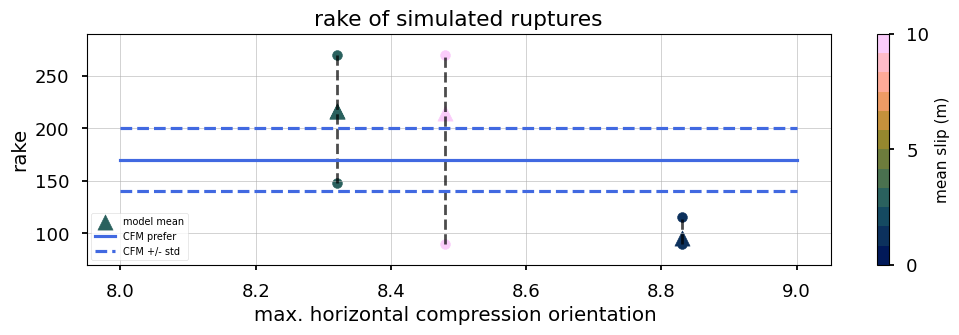

In [ ]:
from palettable.scientific import sequential as cmapa
cmap2 = ListedColormap(cmapa.Batlow_12.mpl_colors)
my_cmap = cmap2(np.arange(12))

newcmap = ListedColormap(my_cmap)

plt.figure(figsize=(12,3))

# crustal
crustal_models = ['crustal/dataset/stress_jp3yA.csv','crustal/dataset/stress_jp3yB.csv','crustal/dataset/stress_jp3yC.csv',\
          'crustal/dataset/stress_jp3yD.csv', 'crustal/dataset/stress_jp3yE.csv','crustal/dataset/stress_jp3yF.csv']

crustal_models = ['crustal/dataset/stress_jp4g.csv','crustal/dataset/stress_jp4bF.csv','crustal/dataset/stress_jp4bH.csv']
      
mw_models = [8.83,8.48,8.32]
cf_models= [50,50,50,50,50,50]

# for Mw 8.48, 8.32, 7.0+
tc_models = [25,35,45,15,45,25]




for imd, model in enumerate(crustal_models):

    datafile = rootfolder + model 

    rk_max, rk_min,rk_avg, rk_50th, u_avg = load_rake_data(datafile)

    plt.plot((mw_models[imd],mw_models[imd]),(rk_min,rk_max),'--',c='black',linewidth=2.0,alpha=0.7)
    plt.scatter(mw_models[imd],rk_avg,s=120,c= u_avg,marker='^',vmax=10,vmin=0,cmap=newcmap)
    plt.scatter(mw_models[imd],rk_min,s=50,c= u_avg,marker='o',vmax=10,vmin=0,cmap=newcmap)
    plt.scatter(mw_models[imd],rk_max,s=50,c= u_avg,marker='o',vmax=10,vmin=0,cmap=newcmap)

cbar = plt.colorbar()

plt.scatter(mw_models[imd],rk_avg,s=120,c=u_avg,vmax=10,vmin=0,marker='^',cmap=newcmap,label='model mean')
# plt.scatter(mw_models[imd],drop_mean/1e6,s=120,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap,label='average')

plt.plot(np.array([8,9]),np.array([170,170]),'-',c='royalblue',label='CFM prefer')
plt.plot(np.array([8,9]),np.array([200,200]),'--',c='royalblue',label='CFM +/- std')
plt.plot(np.array([8,9]),np.array([140,140]),'--',c='royalblue')


cbar.set_label('mean slip (m)',fontsize=11)
cbar.set_ticks([0,5,10])
plt.legend(loc=3,fontsize=7)
plt.title('rake of simulated ruptures')

# plt.xlim([6.85,9.2])
plt.ylim([70,290])
# plt.yscale('log')
plt.grid(linestyle='-',which='major',linewidth=0.4)

plt.ylabel('rake')
plt.xlabel('max. horizontal compression orientation ')


plt.savefig(rootfolder+'/rake-data-jp4.png',dpi=300)
plt.show()

plt.close()

(15, 3)


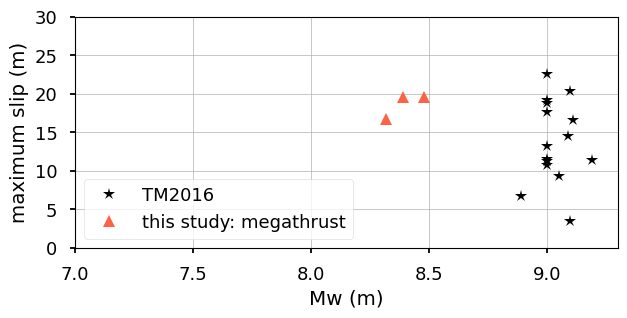

In [56]:
# plot slip and magnitude scaling

txtfile = rootfolder + '/mw_avg_maxslip.txt'
data_source = np.loadtxt(txtfile)
print(data_source.shape)

plt.figure(figsize=(7,3))

plt.plot(data_source[:,0],data_source[:,1],'*k',label='TM2016')

# megathrust
mw_mega= [8.32,8.39,8.48]

datafile = rootfolder + 'Joint4/data-jp4f/slab1_data.csv'
u_max, u_avg, vr_avg = load_slip_data(datafile)
plt.plot(mw_mega[0],(u_max),'^',markerfacecolor='tomato',label='this study: megathrust')

datafile = rootfolder + 'Joint4/data-jp4e/slab1_data.csv'
u_max, u_avg, vr_avg = load_slip_data(datafile)
plt.plot(mw_mega[1],(u_max),'^',markerfacecolor='tomato')

datafile = rootfolder + 'Joint4/data-jp4d/slab1_data.csv'
u_max, u_avg, vr_avg = load_slip_data(datafile)
plt.plot(mw_mega[2],(u_max),'^',markerfacecolor='tomato')

plt.xlim([7,9.3])
plt.ylim([0,30])

plt.xlabel('Mw (m)')
plt.ylabel('maximum slip (m)')
plt.legend(loc=3)
plt.grid(which='both',linewidth=0.5)

plt.savefig(rootfolder+'/mw-slip.png',dpi=300)
plt.show()

plt.close()


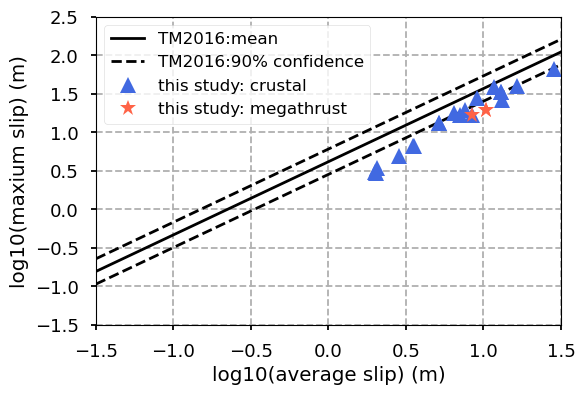

In [ ]:
# empirical relation between Max and avg

mpl.rcParams['lines.markersize'] = 12
mpl.rcParams['lines.linewidth'] = 2


plt.figure(figsize=(6,4))

savg_log = np.linspace(-1.5,1.5,10)
smax_log = 0.95* savg_log + 0.62

plt.plot(savg_log,smax_log,'-',c='k',label='TM2016:mean')
plt.plot(savg_log,smax_log-0.1*1.645,'--',c='k',label='TM2016:90% confidence')
plt.plot(savg_log,smax_log+0.1*1.645,'--',c='k',)



# crustal

# crustal_models = ['crustal/dataset/crustals_welEa.csv','crustal/dataset/crustals_welA.csv','crustal/dataset/crustals_c9s35.csv',\
#     'crustal/dataset/crustals_c9s20.csv','crustal/dataset/crustals_c9s40.csv','crustal/dataset/crustals_welBb.csv',\
#         'crustal/dataset/crustals_welD.csv','crustal/dataset/crustals_welC.csv','Joint4/data-jp4f/crustals_data.csv',\
#              'Joint4/data-jp4e/crustals_data.csv' ]

for imd, model in enumerate(crustal_models):

    datafile = rootfolder + model 

    u_max, u_avg, vr_avg = load_slip_data(datafile)
    plt.plot(np.log10(u_avg),np.log10(u_max),'^',c='royalblue')

plt.plot(np.log10(u_avg),np.log10(u_max),'^',c='royalblue',label='this study: crustal')

# megathrust
datafile = rootfolder + 'Joint4/data-jp4f/slab1_data.csv'
u_max, u_avg, vr_avg = load_slip_data(datafile)
plt.plot(np.log10(u_avg),np.log10(u_max),'*',markerfacecolor='tomato',label='this study: megathrust')

datafile = rootfolder + 'Joint4/data-jp4e/slab1_data.csv'
u_max, u_avg, vr_avg= load_slip_data(datafile)
plt.plot(np.log10(u_avg),np.log10(u_max),'*',markerfacecolor='tomato')

datafile = rootfolder + 'Joint4/data-jp4d/slab1_data.csv'
u_max, u_avg, vr_avg = load_slip_data(datafile)
plt.plot(np.log10(u_avg),np.log10(u_max),'*',markerfacecolor='tomato')

plt.xlim([-1.5,1.5])
plt.ylim([-1.5,2.5])

plt.xlabel('log10(average slip) (m)')
plt.ylabel('log10(maxium slip) (m)')
plt.legend(loc=2)
plt.grid(linestyle='--',linewidth=0.5)

plt.savefig(rootfolder+'/slip-scaling.png',dpi=300)
plt.show()

plt.close()

In [ ]:


# print(vr)

(231543, 3) (77181, 3)


In [265]:
# calculate stres drop and rupture speed

ssfile = rootfolder + 'crustal/dataset/stress_jp3w.csv'

def load_ss_data(ssfile):

    data = pd.read_csv(ssfile)

    # select Aal>0 will change cell selected in dataset, T=0 will be remove
    df = data[data["ASl"]>0.50]

    u_max = np.max(df['ASl'])


    if u_max > 90:

        u_max = np.max(df[df['ASl']<18.0]['ASl'])
        u_avg = np.mean(df[df['ASl']<18.0]['ASl'])

    else:
        u_avg = np.mean(df[df['ASl']>0.50]['ASl'])
    
    
    df1 = data[data["Time"]==0]
    df2 = data[data["TimeStep"].isin([80,154,160,100,82,68,63])]

    vr_mean = np.mean(df['Vr'])
    
    drop = df1['dstress'].to_numpy() - df2['dstress'].to_numpy()
    slp = df2['ASl'].to_numpy()

    # select where stress drop is positive

    index = np.where( (slp < 18.50) & (drop>10000.0) )

    drop_mean = np.sum(drop[index]*slp[index])/np.sum(slp[index])
    # drop_mean = np.mean(drop[index])

    drop_max = np.max(drop[index])
    drop_50th = np.percentile(drop[index], 50)
    drop_90th = np.percentile(drop[index], 80)
    drop_10th = np.percentile(drop[index], 20)
   

    return drop_mean, vr_mean, drop_max, drop_50th, drop_90th, drop_10th, u_max,u_avg

drop_mean, vr_mean,drop_max ,drop_50th, drop_90th, drop_10th,u_max,u_avg = load_ss_data(ssfile)

print(drop_mean,vr_mean,drop_max,drop_50th, drop_90th, drop_10th,u_avg)

13728455.355835678 2798202118282.883 35357400.0 2080900.0 16546520.0 414000.0 11.287594188313744


In [ ]:
# Load dataset used in the calculation

# crustal stress + slip +dstress data
crustal_models = ['crustal/dataset/stress_welEa.csv','crustal/dataset/stress_welD.csv','crustal/dataset/stress_welBb.csv',\
    'crustal/dataset/stress_welC.csv','crustal/dataset/stress_welA.csv','crustal/dataset/stress_jp4d.csv', \
      'crustal/dataset/stress_jp4e.csv','crustal/dataset/stress_jp4f.csv','crustal/dataset/stress_jp3w.csv',\
        'crustal/dataset/stress_jp3x.csv','crustal/dataset/stress_jp3xSF2.csv','crustal/dataset/stress_jp3a.csv',\
          'crustal/dataset/stress_jp3b.csv','crustal/dataset/stress_jp3d.csv','crustal/dataset/stress_jp3f.csv', \
          'crustal/dataset/stress_jp3g.csv', 'crustal/dataset/stress_welEbasin.csv','crustal/dataset/stress_jp3k.csv']
      
mw_models = [7.07, 7.11,7.16,7.08,7.08,8.32, 8.48,8.39,8.32,8.72,8.68,8.4,8.9,8.7,7.9,7.9,7.24,7.6]

cf_models= [50,50,50,50,50,50,50,50,50,50,100,100,150,150,130,130,50,100]
# for Mw 8.48, 8.32, 7.0+
tc_models = [50,40,20]

# crustal
crustal_eng_models = ['crustal/dataset/energy_welEa.csv','crustal/dataset/energy_welD.csv','crustal/dataset/energy_welBb.csv',\
    'crustal/dataset/energy_welC.csv','crustal/dataset/energy_welA.csv','crustal/dataset/energy_jp4d.csv', \
      'crustal/dataset/energy_jp4e.csv','crustal/dataset/energy_jp4f.csv','crustal/dataset/energy_jp3w.csv',\
        'crustal/dataset/energy_jp3x.csv','crustal/dataset/energy_jp3xSF2.csv','crustal/dataset/energy_jp3a.csv',\
          'crustal/dataset/energy_jp3b.csv','crustal/dataset/energy_jp3d.csv','crustal/dataset/energy_jp3f.csv', \
          'crustal/dataset/energy_jp3g.csv', 'crustal/dataset/energy_welEbasin.csv','crustal/dataset/energy_jp3k.csv']   

mw_models = [7.07, 7.11,7.16,7.08,7.08,8.32, 8.48,8.39,8.32,8.72,8.68,8.4,8.9,8.7,7.9,7.9,7.24,7.6]

cf_models= [50,50,50,50,50,50,50,50,50,50,100,100,150,150,130,130,50,100]

# for Mw 8.48, 8.32, 7.0+
tc_models = [50,40,20]




In [130]:
# setup colorbar for scatter plots

from palettable.scientific import sequential as cmapa
cmap2 = ListedColormap(cmapa.Batlow_6.mpl_colors)
my_cmap = cmap2(np.arange(6))

newcmap = ListedColormap(my_cmap)

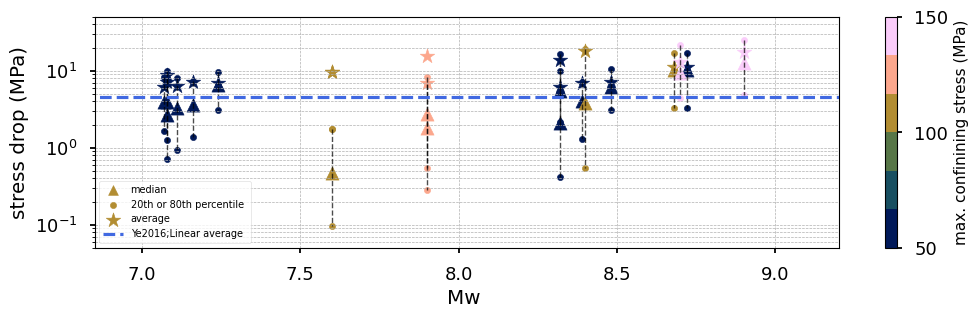

In [ ]:
# stress drop vs. magnitude scaling ; Ye et al. 2016


plt.figure(figsize=(12,3))

for imd, model in enumerate(crustal_models):

    datafile = rootfolder + model 

    drop_mean, vr_mean,drop_max,drop_50th, drop_90th, drop_10th,u_max,u_avg = load_ss_data(datafile)

    plt.plot((mw_models[imd],mw_models[imd]),(drop_90th/1e6,drop_10th/1e6),'--',c='black',linewidth=1.0,alpha=0.7)

    plt.scatter(mw_models[imd],drop_90th/1e6,s=20,c=cf_models[imd],vmax=150,vmin=50,cmap=newcmap)
    plt.scatter(mw_models[imd],drop_10th/1e6,s=20,c=cf_models[imd],vmax=150,vmin=50,cmap=newcmap)
    plt.scatter(mw_models[imd],drop_50th/1e6,s=90,c=cf_models[imd],marker='^',vmax=150,vmin=50,cmap=newcmap)

    plt.scatter(mw_models[imd],drop_mean/1e6,s=120,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap)

cbar = plt.colorbar()

plt.scatter(mw_models[imd],drop_50th/1e6,s=50,c=cf_models[imd],vmax=150,vmin=50,marker='^',cmap=newcmap,label='median')
plt.scatter(mw_models[imd],drop_90th/1e6,s=20,c=cf_models[imd],vmax=150,vmin=50,cmap=newcmap,label='20th or 80th percentile ')

plt.scatter(mw_models[imd],drop_mean/1e6,s=120,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap,label='average')

plt.plot(np.array([6,10]),np.array([4.63,4.63]),'--',c='royalblue',label='Ye2016;Linear average')


cbar.set_label('max. confinining stress (MPa)',fontsize=11)
cbar.set_ticks([50,100,150])
plt.legend(loc=3,fontsize=7)

plt.xlim([6.85,9.2])
plt.ylim([0.05,50])
plt.yscale('log')
plt.grid(linestyle='--',which='both',linewidth=0.5)

plt.ylabel('stress drop (MPa)')
plt.xlabel('Mw ')


plt.savefig(rootfolder+'/StressDrop-scaling.png',dpi=300)
plt.show()

plt.close()

In [37]:
# rootfolder = '/Users/DuoL/Documents/NSHM/Central/'

ssfile = rootfolder + 'crustal/dataset/energy_jp3g.csv'
# ssfile = rootfolder + 'crustal/dataset/energy_welF400tap.csv'

from EnergyFunc.energy_calculate import load_ss_slp_area_radiate
drop_mean, drop_max ,drop_50th, drop_90th, drop_10th,u_max,u_avg,ss_ini,ss_fin,inf_eng, rad_eng,rad_eng_mean = load_ss_slp_area_radiate(ssfile)

print(drop_mean,u_avg,ss_ini,ss_fin,inf_eng,rad_eng,rad_eng_mean)

7794416.542537351 5.0857301356626605 16699106.132183375 13730517.157500278 22154941.318884272 2.202294811348549e+17 20206337.183249936


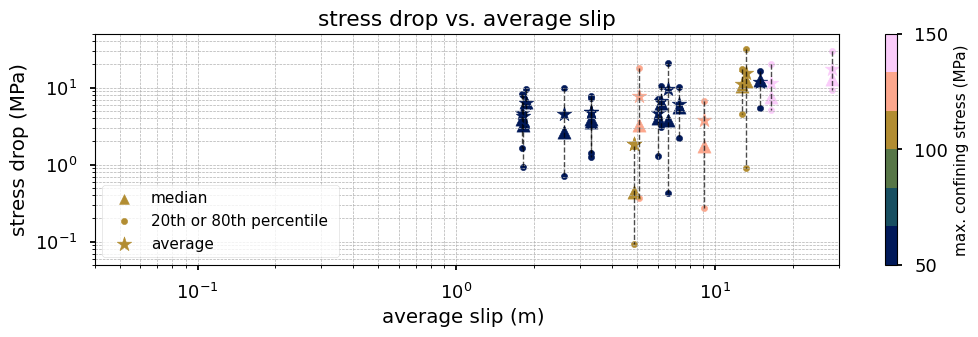

In [ ]:
# stress drop vs. average  fault slip; Ye et al. 2016

from palettable.scientific import sequential as cmapa
cmap2 = ListedColormap(cmapa.Batlow_6.mpl_colors)
my_cmap = cmap2(np.arange(6))

newcmap = ListedColormap(my_cmap)

plt.figure(figsize=(12,3))



for imd, model in enumerate(crustal_eng_models):

    datafile = rootfolder + model 

    drop_mean,drop_max,drop_50th, drop_90th, drop_10th,u_max,u_avg,ss_ini,ss_fin,inf_eng,rad_eng,rad_eng_mean  = load_ss_slp_area_data(datafile)

    plt.plot((u_avg,u_avg),(drop_90th/1e6,drop_10th/1e6),'--',c='black',linewidth=1.0,alpha=0.7)

    plt.scatter(u_avg,drop_90th/1e6,s=20,c=cf_models[imd],vmax=150,vmin=50,cmap=newcmap)
    plt.scatter(u_avg,drop_10th/1e6,s=20,c=cf_models[imd],vmax=150,vmin=50,cmap=newcmap)
    plt.scatter(u_avg,drop_50th/1e6,s=90,c=cf_models[imd],marker='^',vmax=150,vmin=50,cmap=newcmap)
    plt.scatter(u_avg,drop_mean/1e6,s=120,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap)

cbar = plt.colorbar()

plt.scatter(u_avg,drop_50th/1e6,s=50,c=cf_models[imd],vmax=150,vmin=50,marker='^',cmap=newcmap,label='median')
plt.scatter(u_avg,drop_90th/1e6,s=20,c=cf_models[imd],vmax=150,vmin=50,cmap=newcmap,label='20th or 80th percentile ')

plt.scatter(u_avg,drop_mean/1e6,s=120,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap,label='average')

# plt.plot(np.array([6,10]),np.array([4.63,4.63]),'--',c='royalblue',label='Ye2016;Linear average')


cbar.set_label('max. confining stress (MPa)',fontsize=11)
cbar.set_ticks([50,100,150])
plt.legend(loc=3,fontsize=11)
plt.title('stress drop vs. average slip')

plt.xlim([0.04,30])
plt.ylim([0.05,50])

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='--',which='both',linewidth=0.5)

plt.ylabel('stress drop (MPa)')
plt.xlabel('average slip (m) ')


plt.savefig(rootfolder+'/stressdrop-slip-scaling.png',dpi=300)
plt.show()

plt.close()

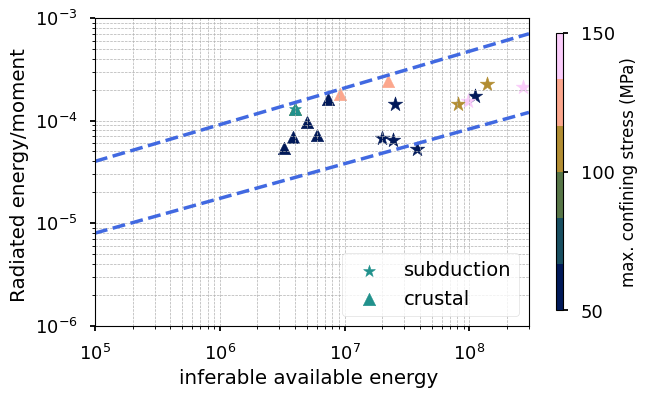

In [ ]:
# average initial / final  stress vs. average  fault slip; Ye et al. 2016

plt.figure(figsize=(7,4))



for imd, model in enumerate(crustal_eng_models):

    datafile = rootfolder + model 

    drop_mean,drop_max,drop_50th, drop_90th, drop_10th,u_max,u_avg,ss_ini,ss_fin,inf_eng,rad_eng,rad_eng_mean  = load_ss_slp_area_data(datafile)

    if mw_models[imd]>8.0:
        plt.scatter(inf_eng, (rad_eng)/10**(1.5*(mw_models[imd]+6.07)),s=120,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap)
    else:
        plt.scatter(inf_eng, (rad_eng)/10**(1.5*(mw_models[imd]+6.07)),s=80,c=cf_models[imd],marker='^',vmax=150,vmin=50,cmap=newcmap)

    # print('model and inferable energy:'+ model + str((rad_eng)/10**(1.5*(mw_models[imd]+6.07))))

cbar = plt.colorbar(shrink=0.9,aspect=40)

plt.scatter(inf_eng, (rad_eng)/10**(1.5*(mw_models[imd]+6.07)),s=80,c=cf_models[imd],marker='*',vmax=150,vmin=50,label='subduction')
plt.scatter(inf_eng, (rad_eng)/10**(1.5*(mw_models[imd]+6.07)),s=80,c=cf_models[imd],marker='^',vmax=150,vmin=50,label='crustal')

# plt.plot([1e5,1e8],[8.e-6,1.2e-4],'--',c='royalblue')
plt.plot([1e5,3e8],[8e-6,(1.2e-4-8e-6)/(3e8-1e5) * (3e8-1e5) + 8e-6], '--',c='royalblue')

# plt.plot([1e5,1e8],[4e-5,7e-4],'--',c='royalblue',label='observation inference')
plt.plot([1e5,3e8],[4e-5,(7e-4-4e-5)/(3e8-1e5) * (3e8-1e5) + 4e-5], '--',c='royalblue')

cbar.set_label('max. confining stress (MPa)',fontsize=12)

cbar.set_ticks([50,100,150])
plt.legend(loc=4,fontsize=14)

# plt.title('scaled radiated energy vs. moment magnitude')

plt.xlim([1e5,3e8])
plt.ylim([1e-6 ,1e-3])

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='--',which='both',linewidth=0.5)

plt.ylabel('Radiated energy/moment ')
plt.xlabel('inferable available energy ')


plt.savefig(rootfolder+'/ScaledEng-inferable-scaling2.png',dpi=400)
plt.show()

plt.close()

In [ ]:
ssfile = rootfolder + 'crustal/dataset/stress_jp3g.csv'
# ssfile = rootfolder + 'crustal/dataset/energy_welF400tap.csv'

def load_ss_slp_data(ssfile):

    data = pd.read_csv(ssfile)

    # select Aal>0 will change cell selected in dataset, T=0 will be remove
    df = data[data["ASl"]>0.50]
    u_max = np.max(df['ASl'])

    if u_max > 90:

        u_max = np.max(df[df['ASl']<18.0]['ASl'])
        u_avg = np.mean(df[df['ASl']<18.0]['ASl'])

    else:
        u_avg = np.mean(df[df['ASl']>0.50]['ASl'])
    
    
    df1 = data[data["Time"]==0]
    df2 = data[data["TimeStep"].isin([80,154,160,100,82,68,63,76])]
    
    drop = df1['dstress'].to_numpy() - df2['dstress'].to_numpy()

    index = np.where( drop > 10000.0 )

    # setup critical slip distance 
    dc_mod = 0.5

    # area_all = np.sum(df2['Area'].to_numpy()[index])

    drop_mean = np.mean(drop[index])
    drop_max = np.max(drop[index])
    drop_50th = np.percentile(drop[index], 50)
    drop_90th = np.percentile(drop[index], 80)
    drop_10th = np.percentile(drop[index], 20)

    ss_ini = np.mean(df1['dstress'].to_numpy())
    ss_fin = np.mean(df2['dstress'].to_numpy())

    inf_eng = np.mean( 0.5* drop[index]  * df2['ASl'].to_numpy()[index] )
    rad_eng_mean = np.mean( 0.5* drop[index]  * df2['ASl'].to_numpy()[index]    - (0.5* drop[index] * dc_mod ))

    return drop_mean, drop_max, drop_50th, drop_90th, drop_10th, u_max,u_avg,ss_ini,ss_fin,inf_eng, rad_eng_mean

drop_mean, drop_max ,drop_50th, drop_90th, drop_10th,u_max,u_avg,ss_ini,ss_fin, inf_eng, rad_eng_mean= load_ss_slp_data(ssfile)

print(drop_mean,drop_max,drop_50th, drop_90th, drop_10th,u_avg,ss_ini,ss_fin,inf_eng, rad_eng_mean)

4354484.832155525 13975600.0 2947600.0 8602340.0 619440.0 7.006296719219412 5233442.783257461 4708830.605822677 23505828.74415691 22417207.536118027


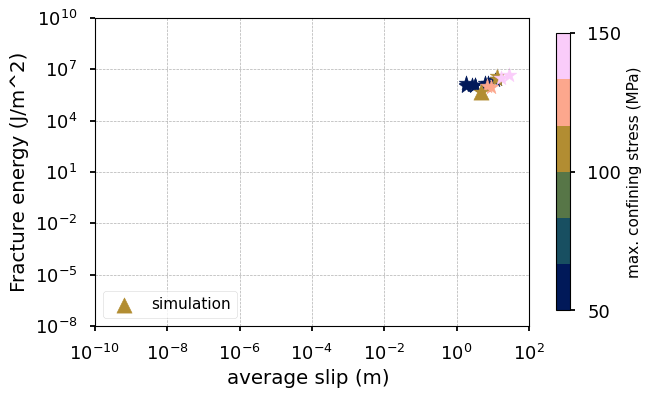

In [ ]:
# load data from 
##

plt.figure(figsize=(7,4))

for imd, model in enumerate(crustal_models):

    datafile = rootfolder + model 

    drop_mean,drop_max,drop_50th, drop_90th, drop_10th,u_max,u_avg,ss_ini,ss_fin,inf_eng, rad_eng_mean  = load_ss_slp_data(datafile)

    # plt.scatter(u_avg,frac_eng,s=80,c=cf_models[imd],marker='o',vmax=150,vmin=50,cmap=newcmap)
    plt.scatter(u_avg, inf_eng-rad_eng_mean,s=120,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap)

cbar = plt.colorbar(shrink=0.9)

plt.scatter(u_avg, inf_eng -rad_eng_mean,s=120,c=cf_models[imd],marker='^',vmax=150,vmin=50,cmap=newcmap,label='simulation')

cbar.set_label('max. confining stress (MPa)',fontsize=11)

cbar.set_ticks([50,100,150])
plt.legend(loc=3,fontsize=11)
# plt.title('scaled radiated energy vs. moment magnitude')

plt.xlim([1e-10, 100])
plt.ylim([1e-8 ,1e10])

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='--',which='both',linewidth=0.5)

plt.ylabel('Fracture energy (J/m^2)')
plt.xlabel('average slip (m) ')

plt.savefig(rootfolder+'/FracEnergy-slip-scaling.png',dpi=300)
plt.show()

plt.close()

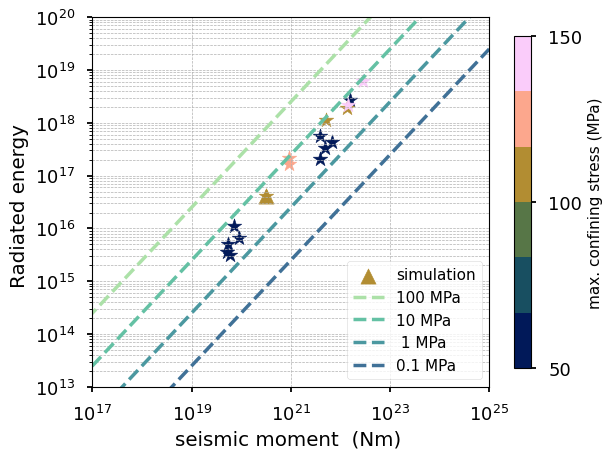

In [ ]:
# radiated energy and seismic moment

my_map = Cmap2(np.arange(12))

from EnergyFunc.energy_calculate import load_ss_slp_area_radiate

for imd, model in enumerate(crustal_eng_models):

    datafile = rootfolder + model 

    drop_mean,drop_max,drop_50th, drop_90th, drop_10th,u_max,u_avg,ss_ini,ss_fin,inf_eng,rad_eng, rad_eng_mean  = load_ss_slp_area_radiate(datafile)

    # plt.scatter(u_avg,frac_eng,s=80,c=cf_models[imd],marker='o',vmax=150,vmin=50,cmap=newcmap)
    plt.scatter(10**(1.5*(mw_models[imd]+6.07)), rad_eng,s=120,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap)

cbar = plt.colorbar(shrink=0.9)

plt.scatter(10**(1.5*(mw_models[imd]+6.07)), rad_eng,s=120,c=cf_models[imd],marker='^',vmax=150,vmin=50,cmap=newcmap,label='simulation')

# scaling between radiation energy with moment
mu= 40.0e9

sigma_a = 100.0e6
pp = np.array([1e-5,1e25])
plt.plot(pp,pp*sigma_a/mu,'--',c=my_map[2],label='100 MPa')

sigma_a = 10e6
plt.plot(pp,pp*sigma_a/mu,'--',c=my_map[4],label='10 MPa')

sigma_a = 1e6
plt.plot(pp,pp*sigma_a/mu,'--',c=my_map[6],label=' 1 MPa')

sigma_a = 0.1e6
plt.plot(pp,pp*sigma_a/mu,'--',c=my_map[8],label='0.1 MPa')


cbar.set_label('max. confining stress (MPa)',fontsize=11)

cbar.set_ticks([50,100,150])
plt.legend(loc=4,fontsize=11)
# plt.title('scaled radiated energy vs. moment magnitude')

plt.xlim([1e17, 1e25])
plt.ylim([1e13 ,1e20])

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='--',which='both',linewidth=0.5)

plt.ylabel('Radiated energy ')
plt.xlabel('seismic moment  (Nm) ')


plt.savefig(rootfolder+'/RadiateEng-mo-scaling.png',dpi=400)
plt.show()

plt.close()

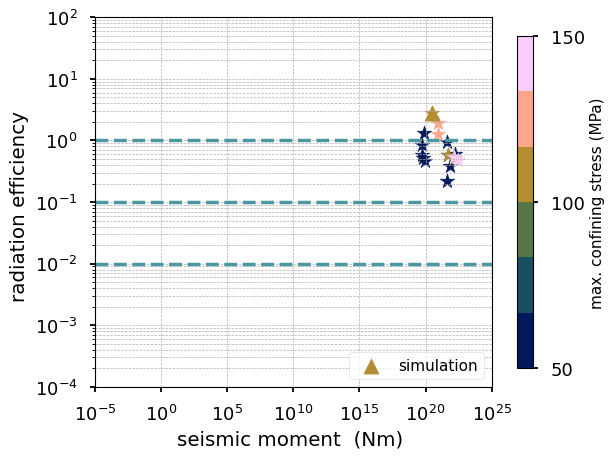

In [358]:
from EnergyFunc.energy_calculate import load_ss_slp_area_radiate

mu= 40.0e9


for imd, model in enumerate(crustal_eng_models):

    datafile = rootfolder + model 

    drop_mean,drop_max,drop_50th, drop_90th, drop_10th,u_max,u_avg,ss_ini,ss_fin,inf_eng,rad_eng, rad_eng_mean  = load_ss_slp_area_radiate(datafile)

    plt.scatter(10**(1.5*(mw_models[imd]+6.07)), (mu*rad_eng/10**(1.5*(mw_models[imd]+6.07)))/drop_mean,s=120,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap)

cbar = plt.colorbar(shrink=0.9)

plt.scatter(10**(1.5*(mw_models[imd]+6.07)), (mu*rad_eng/10**(1.5*(mw_models[imd]+6.07)))/drop_mean,s=120,c=cf_models[imd],marker='^',vmax=150,vmin=50,cmap=newcmap,label='simulation')

# scaling between radiation energy with moment

sigma_a = 100.0e6
pp = np.array([1e-5, 1e25])
plt.plot(pp,[1,1],'--',c=my_map[6])
plt.plot(pp,[0.1,0.1],'--',c=my_map[6])
plt.plot(pp,[0.01,0.01],'--',c=my_map[6])

cbar.set_label('max. confining stress (MPa)',fontsize=11)

cbar.set_ticks([50,100,150])
plt.legend(loc=4,fontsize=11)

plt.xlim([1e-5, 1e25])
plt.ylim([1e-4 ,1e2])

plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='--',which='both',linewidth=0.5)

plt.ylabel('radiation efficiency ')
plt.xlabel('seismic moment  (Nm) ')

plt.savefig(rootfolder+'/Efficiency-mo-scaling.png',dpi=400)
plt.show()

plt.close()

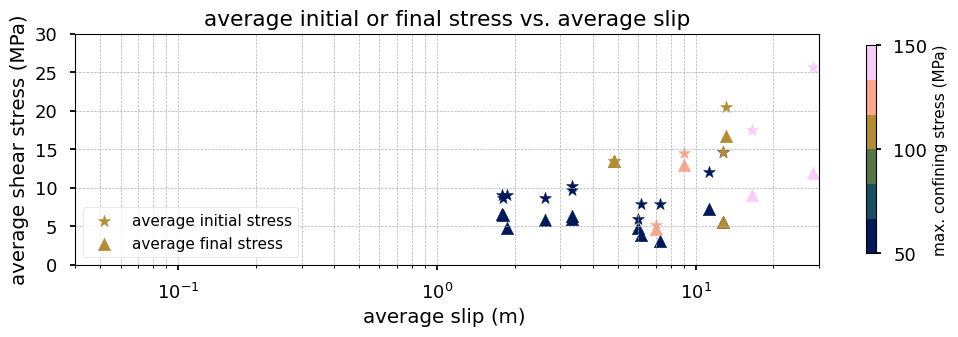

In [ ]:
plt.figure(figsize=(12,3))

for imd, model in enumerate(crustal_models):

    datafile = rootfolder + model 

    drop_mean,drop_max,drop_50th, drop_90th, drop_10th,u_max,u_avg,ss_ini,ss_fin,inf_eng,frac_eng  = load_ss_slp_data(datafile)

    # plt.plot((u_avg,u_avg),(drop_90th/1e6,drop_10th/1e6),'--',c='black',linewidth=1.0,alpha=0.7)

    plt.scatter(u_avg,ss_ini/1e6,s=80,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap)
    plt.scatter(u_avg,ss_fin/1e6,s=80,c=cf_models[imd],marker='^',vmax=150,vmin=50,cmap=newcmap)

cbar = plt.colorbar(shrink=0.9)

plt.scatter(u_avg,ss_ini/1e6,s=80,c=cf_models[imd],marker='*',vmax=150,vmin=50,cmap=newcmap,label='average initial stress')
plt.scatter(u_avg,ss_fin/1e6,s=80,c=cf_models[imd],marker='^',vmax=150,vmin=50,cmap=newcmap,label='average final stress')


cbar.set_label('max. confining stress (MPa)',fontsize=11)

cbar.set_ticks([50,100,150])
plt.legend(loc=3,fontsize=11)
plt.title('average initial or final stress vs. average slip')

plt.xlim([0.04,30])
plt.ylim([0 ,30])

# plt.yscale('log')
plt.xscale('log')
plt.grid(linestyle='--',which='both',linewidth=0.5)

plt.ylabel('average shear stress (MPa)')
plt.xlabel('average slip (m) ')


plt.savefig(rootfolder+'/InitialStress-Slip-scaling.png',dpi=300)
plt.show()

plt.close()

In [ ]:
# plot magnitude- duration scaling

# vr_const = vr_mean
# ss_const = drop_mean

# ashape = 0.001
# gamma = 2
# C = 1

# m0_log = np.linspace(17,22,4)
# tc_log = C*ashape**2/3/gamma * (10**m0_log/ss_const)**1/3 / vr_const 

# plt.plot(m0_log,np.log10(tc_log),'-',c='k',label='Kanamori and Anderson [1975]')
# plt.plot(tc,m0_log,'--',c='k',label='Kanamori and Anderson [1975] ')
# plt.plot(tc,m0_log,'--',c='k',)

# for imd, model in enumerate(crustal_models):

#     datafile = rootfolder + model 

#     drop_mean, vr_mean,drop_max = load_ss_data(datafile)

#     m0 = 10**((mw_models[imd]+6.02)/2*3)

#     plt.plot(np.log10(m0),np.log10(tc_models[imd]),'^',c='royalblue')

# plt.plot(np.log10(m0),np.log10(tc_models[imd]),'^',c='royalblue',label='this study: crustal')



Index(['group', 's_xx', 's_xy', 's_xz', 's_yy', 's_yz', 's_zz',
       'vtkValidPointMask', 'arc_length', 'Points:0', 'Points:1', 'Points:2'],
      dtype='object')


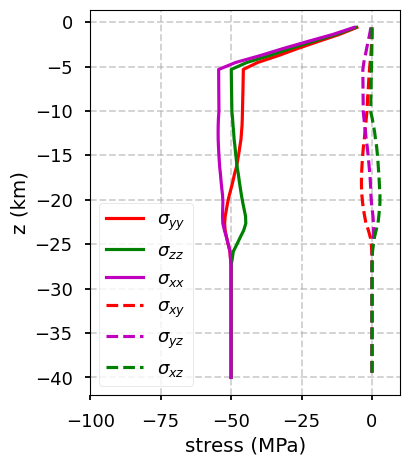

In [116]:

mpl.style.use('seaborn-v0_8-talk') # Lovely plotting style

modelname = 'jp4g'
ssfile = rootfolder + '/Joint3/profiles/'  + 'ss_profile_' + modelname +'.csv'

ssdata = pd.read_csv(ssfile)

print(ssdata.keys())

plt.figure(figsize=(4,5))
# plt.plot(1/3*(ssdata['s_xx']+ssdata['s_yy']+ssdata['s_zz'])/1e6,ssdata['Points:2']/1e3,'-r',label='mean')
plt.plot(ssdata['s_yy']/1e6,ssdata['Points:2']/1e3,'-r',label=r"$\sigma_{yy}$")
plt.plot(ssdata['s_zz']/1e6,ssdata['Points:2']/1e3,'-g',label=r"$\sigma_{zz}$")
plt.plot(ssdata['s_xx']/1e6,ssdata['Points:2']/1e3,'-m',label=r"$\sigma_{xx}$")

plt.plot(ssdata['s_yz']/1e6,ssdata['Points:2']/1e3,'--r',label=r"$\sigma_{xy}$")
plt.plot(ssdata['s_xy']/1e6,ssdata['Points:2']/1e3,'--m',label=r"$\sigma_{yz}$")
plt.plot(ssdata['s_xz']/1e6,ssdata['Points:2']/1e3,'--g',label=r"$\sigma_{xz}$")

plt.xlabel('stress (MPa)')
plt.ylabel('z (km)')
plt.xlim([-100,10])

plt.legend(loc=3)

plt.savefig('ss_prfile_'+modelname,dpi=400)
plt.show()

plt.close()


Calculate the stress orientation, sigma_1, sigma_2 and sigma_3


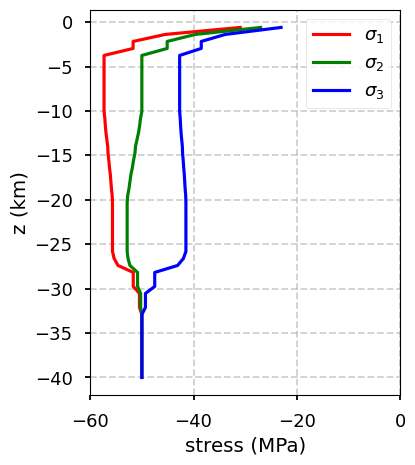

In [128]:
# Compute eigenvalues and eigenvectors
import numpy as np

modelname = 'jp3zG'
ssfile = rootfolder + '/Joint3/profiles/'  + 'ss_profile_' + modelname +'.csv'

ssdata = pd.read_csv(ssfile)

print('Calculate the stress orientation, sigma_1, sigma_2 and sigma_3')
# print(ssdata['Points:2'][50]/1e3)

sig1 = []
sig2 = []
sig3 = []

for npp,idd in enumerate(ssdata['Points:2']):

    A = np.array([[ssdata['s_xx'][npp],ssdata['s_xy'][npp],ssdata['s_xz'][npp]],
    [ssdata['s_xy'][npp],ssdata['s_yy'][npp],ssdata['s_yz'][npp]], 
    [ssdata['s_xz'][npp],ssdata['s_yz'][npp],ssdata['s_zz'][npp]]])

    # print(A)
    eigenvalues, eigenvectors = np.linalg.eig(A)

    eigenvalues.sort()
    sig1.append(eigenvalues[0]/1e6)
    sig2.append(eigenvalues[1]/1e6)
    sig3.append(eigenvalues[2]/1e6)

plt.figure(figsize=(4,5))

plt.plot(sig1,ssdata['Points:2']/1e3,'-r',label=r"$\sigma_1$")
plt.plot(sig2,ssdata['Points:2']/1e3,'-g',label=r"$\sigma_2$")
plt.plot(sig3,ssdata['Points:2']/1e3,'-b',label=r"$\sigma_3$")

plt.xlabel('stress (MPa)')
plt.ylabel('z (km)')
plt.xlim([-60,0])
plt.legend()

plt.savefig('principal_'+modelname,dpi=300)
plt.show()
plt.close()

# Print the results
# print("Eigenvalues:", eigenvalues/1e6)
# print("Eigenvectors:\n", eigenvectors)

# print(eigenvectors[2][1],eigenvectors[2][0])

# print('depth:', ssdata['Points:2'][npp]/1e3)
# print('azimuth from N:' , np.arcsin(eigenvectors[2][0]/np.sqrt(eigenvectors[2][1]**2 +eigenvectors[2][0]**2)) /np.pi*180)
# print('plunge:' , np.arctan(eigenvectors[1][2] /np.sqrt(eigenvectors[1][0]**2 +eigenvectors[1][1]**2 )) /np.pi*180)

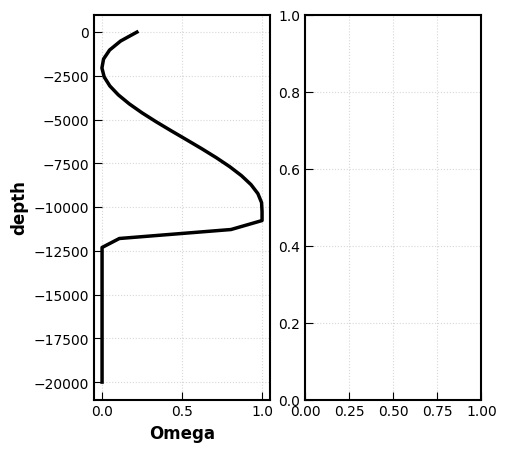

In [41]:
# print principal stress with depth

from DyPltFunc.input_para import plt_omega_func

z1=-2000.0
z2=-10000.0
z3=-11000.0
z4=-12000.0

fig,axe = plt_omega_func(z1,z2,z3,z4)

plt.show()


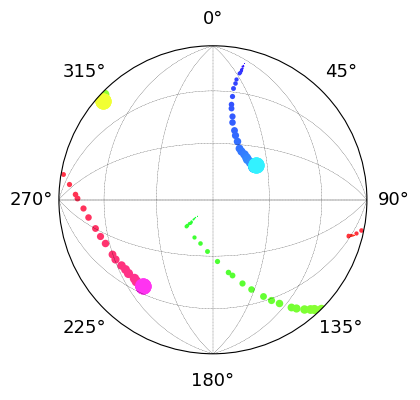

In [ ]:
# Function to calculate the spherical coordinates from a Cartesian vector
def cartesian_to_spherical(v):
    r = np.linalg.norm(v)
    theta = np.arctan2(v[1], v[0])  # Azimuth (longitude)
    phi = np.arccos(v[2] / r)  # Polar angle (latitude)
    return theta, phi

# list colormap

import mplstereonet

# Example stress tensor (replace with your own tensor)
# Stress tensor: [σ_xx, σ_yy, σ_zz, τ_xy, τ_xz, τ_yz]
stress_tensor_list= []

# Plotting on the lower hemisphere projection

fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(111, projection='stereonet')

# example:  Plot a pole
# ax.pole(135, 90, 'ro')

for npp,ik in enumerate(ssdata['Points:2']):

    try: 
        stress_tensor = np.array([[ssdata['s_xx'][npp],ssdata['s_xy'][npp],ssdata['s_xz'][npp]],
            [ssdata['s_xy'][npp],ssdata['s_yy'][npp],ssdata['s_yz'][npp]], 
            [ssdata['s_xz'][npp],ssdata['s_yz'][npp],ssdata['s_zz'][npp]]])

        # print(stress_tensor.shape)

        # Compute eigenvalues (principal stresses) and eigenvectors (directions of principal stresses)
        eigenvalues, eigenvectors = np.linalg.eig(stress_tensor)

        # Sort eigenvalues in ascending order (so that σ1 > σ2 > σ3)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[sorted_indices]
        eigenvectors = eigenvectors[:, sorted_indices]

        # Extract the principal stresses (σ1, σ2, σ3) and directions (unit vectors)
        sigma_1, sigma_2, sigma_3 = eigenvalues
        vec_1, vec_2, vec_3 = eigenvectors.T

        # Normalize vectors to unit vectors
        vec_1_normalized = vec_1 / np.linalg.norm(vec_1)
        vec_2_normalized = vec_2 / np.linalg.norm(vec_2)
        vec_3_normalized = vec_3 / np.linalg.norm(vec_3)

        # Get spherical coordinates (theta, phi) for plotting
        theta1, phi1 = cartesian_to_spherical(vec_1_normalized)
        theta2, phi2 = cartesian_to_spherical(vec_2_normalized)
        theta3, phi3 = cartesian_to_spherical(vec_3_normalized)

        # Convert from radians to degrees
        theta1_deg, phi1_deg = np.degrees(theta1), np.degrees(phi1)
        theta2_deg, phi2_deg = np.degrees(theta2), np.degrees(phi2)
        theta3_deg, phi3_deg = np.degrees(theta3), np.degrees(phi3)
    
        ax.pole(theta3_deg,  phi3_deg,'o',color=(1,0.2,npp/53),markersize=12*npp/51)
        ax.pole(theta2_deg,  phi2_deg, 'o',color=(npp/53,1,0.2),markersize=12*npp/51)
        ax.pole(theta1_deg,  phi1_deg, 'o',color=(0.2,npp/53,1.0),markersize=12*npp/51)

    except:
        pass

# Add gridlines for visualization

ax.plane(0,30,'--k',linewidth=0.2)
ax.plane(0,60,'--k',linewidth=0.2)
ax.plane(0,90,'--k',linewidth=0.2)
ax.plane(180,30,'--k',linewidth=0.2)
ax.plane(180,60,'--k',linewidth=0.2)
ax.plane(90,90,'--k',linewidth=0.2)
ax.plane(90,60,'--k',linewidth=0.2)
ax.plane(90,30,'--k',linewidth=0.2)
ax.plane(270,90,'--k',linewidth=0.2)
ax.plane(270,60,'--k',linewidth=0.2)
ax.plane(270,30,'--k',linewidth=0.2)

# ax.pole(theta3_deg,  phi3_deg, color=(1.0,0.0,npp/53), label=r"$\sigma_1$")
# ax.pole(theta2_deg,  phi2_deg, color=(npp/53,1.0,0.0), label=r"$\sigma_2$")
# ax.pole(theta1_deg,  phi1_deg, color=(0.0,npp/53,1.0), label=r"$\sigma_3$")

# Show the plot
plt.savefig('orient_'+modelname,dpi=300)
plt.show()
plt.close()


In [ ]:
# [ssdata['s_xx'][200],ssdata['s_yy'][200],ssdata['s_zz'][200],ssdata['s_xy'][200],ssdata['s_xz'][200],ssdata['s_yz'][200]],
# [ssdata['s_xx'][300],ssdata['s_yy'][300],ssdata['s_zz'][300],ssdata['s_xy'][300],ssdata['s_xz'][300],ssdata['s_yz'][300]],
# [ssdata['s_xx'][400],ssdata['s_yy'][400],ssdata['s_zz'][400],ssdata['s_xy'][400],ssdata['s_xz'][400],ssdata['s_yz'][400]]]

In [ ]:
## load fault output data
from FigFunc.load_fault_data import load_fault_data

modelname = 'wel13B-b24'
modelname = 'wel13B-s25r45'
# nucleation on whitemans fault

modelname = 'c9-s40r45F'
modelname = 'jp3zBcPL'

xdmfFilename = rootfolder +'Joint3/wai/' + modelname+'-fault.xdmf'

slp, triang = load_fault_data(xdmfFilename,'ASl')
pn0, triang = load_fault_data(xdmfFilename,'Pn0')
# srs, triang = load_fault_data(xdmfFilename,'velocity (m/s)')
td0, triang = load_fault_data(xdmfFilename,'Td0')
ts0, triang = load_fault_data(xdmfFilename,'Ts0')

(36395, 3) (71685, 3)
(36395, 3) (71685, 3)


/Users/DuoL/opt/miniconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/DuoL/Documents/PythonPath/FigFunc/load_fault_data.py:19: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  surf = pyproj.transform(myproj,lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
/Users/DuoL/opt/miniconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/

(36395, 3) (71685, 3)
(36395, 3) (71685, 3)


/Users/DuoL/opt/miniconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/Users/DuoL/Documents/PythonPath/FigFunc/load_fault_data.py:19: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  surf = pyproj.transform(myproj,lla,surfxyz[:,0],surfxyz[:,1], surfxyz[:,1], radians=False)
/Users/DuoL/opt/miniconda3/lib/python3.12/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/

In [9]:
# create fault feature edge file and stored in vtk

# import meshio
# import pyvista as pv


# faultname = 'wairarapa_edge'

# FaultMeshPath = rootfolder + 'Paraviews/'+ faultname + ".vtk"

# TrialFaultMesh = pv.read(FaultMeshPath)

# # extract edge of fault mesh for plotting Hikurangi
# mesh_surface = TrialFaultMesh.extract_surface()

# # Recompute normals for better edge detection
# mesh_surface = mesh_surface.compute_normals(auto_orient_normals=True)

# # Attempt to extract feature edges with a mid-range threshold
# feature_edges = mesh_surface.extract_feature_edges(
#     feature_angle=20.0,       # Adjust this value based on the sharpness of your features
#     boundary_edges=True,      # Include boundary edges if they are part of the desired interface
#     non_manifold_edges=False, # Typically disable these unless needed
#     feature_edges=True        # Focus on sharp feature edges
# )

# feature_edges.clear_data() 

# print(feature_edges)
# feature_edges.save(faultname + '2.vtk')


In [36]:
import pyvista as pv
import meshio

# create mesh file

# FaultMeshPath = "./FltMesh_" + modelname + ".vtk"
FaultMeshPath = "./Paraviews/slab_hik_edge" + ".vtk"

# modelname = 'rup9'
sx = seissolxdmf.seissolxdmf(xdmfFilename)

# ndt = sx.ReadNdt()
TrialFault_xyz = sx.ReadGeometry()
TrialFault_connect = sx.ReadConnect()

FaultMesh = meshio.write_points_cells(FaultMeshPath, TrialFault_xyz, [("triangle",TrialFault_connect)])
# del FaultMesh

# Load fault mesh onto pyvista
TrialFaultMesh = pv.read(FaultMeshPath)
fault_edges = TrialFaultMesh.extract_feature_edges(boundary_edges=True,feature_edges=True,non_manifold_edges=False,feature_angle=30)

# TrialFaultMesh["fault slip (m)"] = slp[-1,:]
TrialFaultMesh["stress drop (MPa)"] = np.sqrt(td0[0,:]**2+ts0[0,:]**2)/1e6 -np.sqrt(td0[-1,:]**2+ts0[-1,:]**2)/1e6
# TrialFaultMesh["dip slip rate"] = srd[5,:] 

# TrialFaultMesh["rupture velocity (m/s)"] = vr[-1,:]



In [ ]:
# fault_edges.clear_data() 

# FaultMeshPath = "./Paraviews/slab_hik_edge" + ".vtk"
# TrialFaultMesh = pv.read(FaultMeshPath)
# 


# print(fault_edges)
# fault_edges.save('c9model_edge.vtk')

In [14]:
# add synthetic stations along Wellington and Wairarapa Valley

# stfile1 = rootfolder + 'Joint4/profile1_valley.csv'
# st_valley = pd.read_csv(stfile1)

# stfile2 = rootfolder + 'Joint4/profile2_wel_aot_whit.csv'
# st_wel = pd.read_csv(stfile2)

# st1 = np.array([st_valley['Points:0'].to_numpy(),st_valley['Points:1'].to_numpy(),st_valley['Points:2'].to_numpy()])
# st1 = np.array([st_wel['Points:0'].to_numpy(),st_wel['Points:1'].to_numpy(),st_wel['Points:2'].to_numpy()])

# print(st1.shape)

# np.savetxt(rootfolder+'Joint4/profile2.txt',st1.transpose())


In [ ]:
cscale = [0,15.0]

scalar_bar_args = {
    'title': 'stress drop (MPa)',
    'title_font_size': 18,
    'label_font_size': 16,
    'vertical': True,
    'position_x': 0.85,  # position in normalized coordinates
    'position_y': 0.05,
    'width': 0.05,
    'height': 0.3,
    'n_labels': 5,
    'fmt': "%.1f"  # number formatting
}


pl = pv.Plotter()
# pl.add_mesh(TrialFaultMesh)
# pl.add_mesh(TrialFaultMesh,scalars="fault slip (m)", clim=cscale, cmap = Cmap2, show_scalar_bar=False)
pl.add_mesh(TrialFaultMesh,scalars="stress drop (MPa)", clim=cscale, cmap = Cmap5, scalar_bar_args=scalar_bar_args, show_scalar_bar=True)

pl.add_mesh(fault_edges,color='black',line_width=1.5)

# pl.add_mesh(PointCloud,color='red')
# pl.add_mesh(PointCoast,color='gray')
# pl.add_lines(trchxyz.transpose(),connected=True,color='black')

pl.camera.view_angle = 23
pl.camera.azimuth = -140.0
pl.camera.zoom(1.0)
# pl.reset_camera(bounds=[])
pl.show(screenshot='fig-drop-' + modelname +'.png',jupyter_backend="static")

# save figure to image for second process
asl_onfault = pl.image

In [ ]:
cscale = [2000,5000.0]

pl = pv.Plotter()
# pl.add_mesh(TrialFaultMesh)
pl.add_mesh(TrialFaultMesh,scalars="rupture velocity (m/s)", clim=cscale, cmap = Cmap2, show_scalar_bar=False)
# pl.add_mesh(fault_edges,color='black',line_width=1.5)
# edges.plot(line_width=10)

# pl.add_mesh(PointCloud,color='red')
# pl.add_mesh(PointCoast,color='gray')
# pl.add_lines(trchxyz.transpose(),connected=True,color='black')

pl.camera.view_angle = 26
pl.camera.azimuth = -100.0
pl.camera.zoom(1.15)
# pl.reset_camera(bounds=[])
pl.show(screenshot='fig-vr-' + modelname +'.png',jupyter_backend="static")

# save figure to image for second process
asl_onfault = pl.image

In [ ]:
## PyVista plot fault slip
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize = (6,5),dpi=300)

ax1 = fig.add_subplot(1,1,1)
FaultImage = ax1.imshow(asl_onfault,aspect='auto',cmap=Cmap2,clim=cscale)

ax1.axis('off')

axins1 = inset_axes(ax1,width='50%',height='3%',
                    loc='lower left',bbox_to_anchor=(0.41, 0.05, 0.9,0.7),bbox_transform=ax1.transAxes)

fig.colorbar(FaultImage,shrink=0.95,cax=axins1, orientation="horizontal")

# axins1.set_xlabel('fault slip (m)')
axins1.set_xlabel('stress drop (MPa)')
axins1.set_xlim([0,18])
axins1.set_xticks([0, 6,12, 18])

fig.savefig('fig2-drop-' + modelname +'.png',dpi=300)

In [230]:
## PyVista plot
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig = plt.figure(figsize = (6,5),dpi=300)

ax1 = fig.add_subplot(1,1,1)
FaultImage = ax1.imshow(asl_onfault,aspect='auto',cmap=Cmap2,clim=cscale)

ax1.axis('off')

axins1 = inset_axes(ax1,width='50%',height='3%',
                    loc='lower left',bbox_to_anchor=(0.41, 0.05, 0.9,0.7),bbox_transform=ax1.transAxes)

fig.colorbar(FaultImage,shrink=0.95,cax=axins1, orientation="horizontal")

axins1.set_xlabel('rupture velocity (m/s)')
axins1.set_xlim([2000,5000])
axins1.set_xticks([2000, 3000, 5000])

fig.savefig('fig2-vr-' + modelname +'.png',dpi=300)

<IPython.core.display.Javascript object>

In [118]:
# plot initial parameters

# S = ((0.6*-pn0[0])-td0[0])/((0.1*pn0[0])+td0[0])
# # presstress ratio
# r0 = (np.sqrt(td0[0]**2+ts0[0]**2)+0.1*pn0[0])/(-0.5*pn0[0])

fig,ax0=plt.subplots(nrows=1,ncols=1,figsize=(figsize_single))

sc = ax0.tripcolor(triang,slp[-1,:],cmap='magma',shading='flat',vmax=0,vmin = 30)
ax0.plot(coast[0],coast[1],'-',c='gray',markersize=0.01)
# ax0.plot(siteTable['lon'],siteTable['lat'],'^',color='royalblue',markersize=4.2)

cl = fig.colorbar(sc,ax=ax0)
cl.set_label('fault slip (m)')

# ax0.set_yticks(lat_ticks)
ax0.set_aspect(1)
ax0.set(xlim=( min_long-ext, max_long+ext),ylim=(min_lat-ext,max_lat+ext))
ax0.set_aspect(1)
ax0.set_xlabel('longitude')
ax0.set_ylabel('latitude')

outname = modelname+'-slp2.png'
plt.savefig(outname,dpi=300,transparent=False)
plt.show()



<IPython.core.display.Javascript object>

In [ ]:
# plot parameters

#%%
sr0= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=1,oneDtMem=True,firstElement=-1)
sr1 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=2,oneDtMem=True,firstElement=-1)
sr2= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=3,oneDtMem=True,firstElement=-1)
sr3 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=4,oneDtMem=True,firstElement=-1)
sr4= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=5,oneDtMem=True,firstElement=-1)
sr5 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=6,oneDtMem=True,firstElement=-1)
sr6= LoadData(xdmfFilename,'SRd',connect.shape[0],idt=7,oneDtMem=True,firstElement=-1)
sr7 =LoadData(xdmfFilename,'SRd',connect.shape[0],idt=8,oneDtMem=True,firstElement=-1)



fig,([ax0,ax1],[ax4,ax2],[ax3,ax5],[ax6,ax7])=plt.subplots(nrows=4,ncols=2,figsize=(8,11))


sc = ax0.tripcolor(triang,sr0[0],cmap='plasma',shading='flat',vmin=0,vmax=2.5)
cl = fig.colorbar(sc,ax=ax0)
cl.set_label('slip rat (m/s)')

# ax0.plot(hypoll[4,0],hypoll[4,1],'*w',markersize=5)
ax0.plot(hypoll7[5,0],hypoll7[5,1],'*',color='white',markersize=5) # 

ax0.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax0.set(xlim=(-160.5, -152),ylim=(53.5,58))
ax0.set_yticks([53,54,55,56,57])
# ax0.set_title('t=0.5  s')


sc = ax1.tripcolor(triang,sr1[0],cmap='plasma',shading='flat',vmin=0.0,vmax=2.5)
cl = fig.colorbar(sc,ax=ax1)
cl.set_label('slip rate (m/s)')
# ax1.plot(hypoll[6:,0],hypoll[6:,1],'*w',markersize=5)
ax1.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax1.set(xlim=(-160.5, -152),ylim=(53.5,58))
ax1.set_yticks([53,54,55,56,57])
# ax1.set_title('t=2.0 s')

sc = ax4.tripcolor(triang,sr2[0],cmap='plasma',shading='flat',vmin=0.0,vmax=2.5)
cl = fig.colorbar(sc,ax=ax4)
cl.set_label('slip rate (m/s)')
# ax3.plot(hypoll[:,0],hypoll[:,1],'*w',markersize=5)
ax4.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax4.set(xlim=(-160.5, -152),ylim=(53.5,58))
ax4.set_yticks([53,54,55,56,57])
# ax3.set_title('t=5.0 s')

sc = ax2.tripcolor(triang,sr3[0],cmap='plasma',shading='flat',vmin=0,vmax=2.5)
cl = fig.colorbar(sc,ax=ax2)
cl.set_label('slip rat (m/s)')
# ax2.plot(hypoll[:,0],hypoll[:,1],'*w',markersize=5)
ax2.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax2.set(xlim=(-160.5, -152),ylim=(53.5,58))
ax2.set_yticks([53,54,55,56,57])
# ax2.set_title('t=3.5 s)


sc = ax3.tripcolor(triang,sr4[0],cmap='plasma',shading='flat',vmin=0.0,vmax=2.5)
cl = fig.colorbar(sc,ax=ax3)
cl.set_label('slip rate (m/s)')
# ax3.plot(hypoll[:,0],hypoll[:,1],'*w',markersize=5)
ax3.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax3.set(xlim=(-160.5, -152),ylim=(53.5,58))
ax3.set_yticks([53,54,55,56,57])
# ax3.set_title('t=5.0 s')

sc = ax5.tripcolor(triang,sr5[0],cmap='plasma',shading='flat',vmin=0.0,vmax=2.5)
cl = fig.colorbar(sc,ax=ax5)
cl.set_label('slip rate (m/s)')
# ax3.plot(hypoll[:,0],hypoll[:,1],'*w',markersize=5)
ax5.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax5.set(xlim=(-160.5, -152),ylim=(53.5,58))
ax5.set_yticks([53,54,55,56,57])
# ax5.set_title('t=5.0 s')


sc = ax6.tripcolor(triang,sr6[0],cmap='plasma',shading='flat',vmin=0.0,vmax=2.5)
cl = fig.colorbar(sc,ax=ax6)
cl.set_label('slip rate (m/s)')
# ax3.plot(hypoll[:,0],hypoll[:,1],'*w',markersize=5)
ax6.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax6.set(xlim=(-160.5, -152),ylim=(53.5,58))
ax6.set_yticks([53,54,55,56,57])
# ax3.set_title('t=5.0 s')

sc = ax7.tripcolor(triang,sr7[0],cmap='plasma',shading='flat',vmin=0.0,vmax=2.5)
cl = fig.colorbar(sc,ax=ax7)
cl.set_label('slip rate (m/s)')
# ax3.plot(hypoll[:,0],hypoll[:,1],'*w',markersize=5)
ax7.plot(coast['data'][:,0],coast['data'][:,1],'-k',linewidth=0.3)
ax7.set(xlim=(-160.5, -152),ylim=(53.5,58))
ax7.set_yticks([53,54,55,56,57])
# ax5.set_title('t=5.0 s')


outname = modelname+'-sr-snap.png'
plt.savefig(outname,dpi=200,transparent=False)

<IPython.core.display.Javascript object>


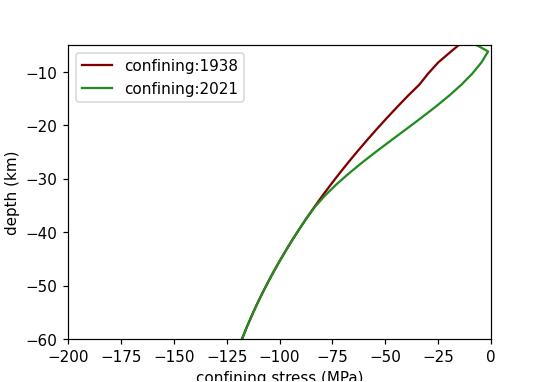

In [63]:
## plot confining stress

dep1 = np.linspace(-60000., 0, 30)
conf = np.linspace(-60000., 0, 30)
conf_west = np.linspace(-60000., 0, 30)


zPoreIncrease = -14000.0;
zPoreIncreaseWidth= -8000.0-zPoreIncrease;
    
for i in range(0,len(dep1)):
    if (dep1[i]>=zPoreIncrease):
        if(dep1[i]>=-8000.0):
            conf[i] = 2670.0*0.116*9.8*dep1[i]
        else:
            conf[i] = 2670.0*(0.116 -(-dep1[i]-8000.0)/zPoreIncreaseWidth*0.016)*9.8*dep1[i]
                  
    else:
        conf[i] = 2670.0*(0.10-(-dep1[i]-20000.0)/(28000.0-20000.0)*0.005)*9.8*dep1[i]

        
zPoreIncrease = -37000.0;
zPoreIncreaseWidth= -5000.0-zPoreIncrease;
    
for i in range(0,len(dep1)):
    if (dep1[i]>=zPoreIncrease):
        if(dep1[i]>=-5000.0):
            conf_west[i] = 2670.0*0.1*9.8*dep1[i]
        else:
            a = 1.0 - (-dep1[i]-5000.)/zPoreIncreaseWidth
            sx = 3.0*a*a-2.*a*a
            conf_west[i] = 2670.0*(0.1-(-dep1[i]-20000.0)/(28000.0-20000.0)*0.005)*9.8*dep1[i]*(1.0-sx)
                  
    else:
        conf_west[i] = 2670.0*(0.10-(-dep1[i]-20000.0)/(28000.0-20000.0)*0.005)*9.8*dep1[i]
        
        
plt.figure(figsize=(figsize_single))
ax0=plt.subplot(111)               

plt.plot(conf/1e6,dep1/1e3,'-',color='maroon',label='confining:1938')   # from MPa*m**2/s to dyne-cm/s
plt.plot(conf_west/1e6,dep1/1e3,'-',color='forestgreen',label='confining:2021')   # from MPa*m**2/s to dyne-cm/s

# plt.legend(['this study'+ ' Mw'+str(round(mag,2)),'USGS Mw8.24','Elliott et al. 2022','Liu et al. 2022','Ye et al. 2022'])
plt.legend()
plt.xlabel('confining stress (MPa)')
plt.ylabel('depth (km)')
ax0.set(xlim=(-200,0),ylim=(-60,-5))

plt.savefig(modelname+'-profile.png',dpi=250)

In [7]:
# read VNO stations
filecsv = 'vno_name_lonlat.csv'
vnostation = pd.read_csv(filecsv)

In [190]:
# print(flonlat[0],flonlat[1])

In [37]:
# prepare receivers

xx = [0,4000.,8000.0,12000.0]
ww = [0,1000.0, 3000.0, 6000.0, 12000.0, 18000.0]

for i, ix in enumerate(xx):
    for j, jw in enumerate(ww):
        yy = -jw/np.cos(15/180*np.pi) 
        zz = -jw/np.sin(15/180*np.pi)
        print(ix, yy,zz)



0 0.0 0.0
0 -1035.276180410083 -3863.7033051562735
0 -3105.828541230249 -11591.10991546882
0 -6211.657082460498 -23182.21983093764
0 -12423.314164920996 -46364.43966187528
0 -18634.971247381494 -69546.65949281292
4000.0 0.0 0.0
4000.0 -1035.276180410083 -3863.7033051562735
4000.0 -3105.828541230249 -11591.10991546882
4000.0 -6211.657082460498 -23182.21983093764
4000.0 -12423.314164920996 -46364.43966187528
4000.0 -18634.971247381494 -69546.65949281292
8000.0 0.0 0.0
8000.0 -1035.276180410083 -3863.7033051562735
8000.0 -3105.828541230249 -11591.10991546882
8000.0 -6211.657082460498 -23182.21983093764
8000.0 -12423.314164920996 -46364.43966187528
8000.0 -18634.971247381494 -69546.65949281292
12000.0 0.0 0.0
12000.0 -1035.276180410083 -3863.7033051562735
12000.0 -3105.828541230249 -11591.10991546882
12000.0 -6211.657082460498 -23182.21983093764
12000.0 -12423.314164920996 -46364.43966187528
12000.0 -18634.971247381494 -69546.65949281292


In [41]:
# off-fault receivers 
xx = [0,10000.0,20000.0]
ww = np.linspace(-9.0e3,45.0e3, 10)

for i, ix in enumerate(xx):
    for j, jw in enumerate(ww):
        print(ix, -jw,0.0)


0 9000.0 0.0
0 3000.0 0.0
0 -3000.0 0.0
0 -9000.0 0.0
0 -15000.0 0.0
0 -21000.0 0.0
0 -27000.0 0.0
0 -33000.0 0.0
0 -39000.0 0.0
0 -45000.0 0.0
10000.0 9000.0 0.0
10000.0 3000.0 0.0
10000.0 -3000.0 0.0
10000.0 -9000.0 0.0
10000.0 -15000.0 0.0
10000.0 -21000.0 0.0
10000.0 -27000.0 0.0
10000.0 -33000.0 0.0
10000.0 -39000.0 0.0
10000.0 -45000.0 0.0
20000.0 9000.0 0.0
20000.0 3000.0 0.0
20000.0 -3000.0 0.0
20000.0 -9000.0 0.0
20000.0 -15000.0 0.0
20000.0 -21000.0 0.0
20000.0 -27000.0 0.0
20000.0 -33000.0 0.0
20000.0 -39000.0 0.0
20000.0 -45000.0 0.0


In [34]:
from netCDF4 import Dataset
import pyproj
import numpy as py


ncfile = '/Users/DuoL/Documents/SeisSol/NewZealand/NZetopoGrd2.grd' # large domain
ncfilew ='/Users/DuoL/Documents/SeisSol/NewZealand/NZetopoGrd2.nc'

topo,x,y = load_topo_large(ncfile)

print(topo.shape, x.shape)

print(x[1,:],y[:,1])

Nx = topo.shape[1]
Ny = topo.shape[0]
Nz = 2
print(Nx,Ny)

fout = Dataset(ncfilew,'w',format='NETCDF4')

fout.createDimension('x',Nx)
fout.createDimension('y',Ny)
fout.createDimension('z',Nz)
fout.createVariable('x','f8',('x',))
fout.createVariable('y','f8',('y',))
fout.createVariable('z','f8',('z',))

# index of x and y are selected from all profiles. 
fout.variables['x'][:] = x[1100,:]
fout.variables['y'][:] = y[:,900]
fout.variables['z'][:] = [-10.0,0.0]

topo_matx = fout.createVariable('grad', 'f8', ('z', 'y', 'x'))
print(topo_matx.shape)
topo_matx[0,:,:] = topo
topo_matx[1,:,:] = topo

fout.close() 


(2161, 1801)
(2161, 1801) 1801 2161


/Users/DuoL/opt/miniconda3/envs/obspy/lib/python3.10/site-packages/pyproj/crs/crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)
/var/folders/7n/hc17svy55_bfzb_y1r6qgry00000gp/T/ipykernel_55110/869015406.py:22: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  x,y = pyproj.transform(lla, myproj, lons.flatten(),lats.flatten(), radians=False)


(3891961,)
(2161, 1801) (2161, 1801)
[1026890.99571096 1027487.29258125 1028083.59166476 ... 2100345.20272957
 2100941.74895528 2101538.29327078] [4430697.33173611 4431622.26884902 4432547.20721481 ... 6429660.01727191
 6430587.65797001 6431515.29983693]
1801 2161
(2, 2161, 1801)


In [24]:
# load NZ  topo data 
def load_topo_large(ncfile):

    nc = Dataset(ncfile,'r')

    lon= nc.variables['lon'][:]
    lat = nc.variables['lat'][:]
    topo = nc.variables['z'][:,:]

    lons,lats = np.meshgrid(lon,lat)
    print(lons.shape)

    nlon = lon.shape[0]
    nlat = lat.shape[0]

    print(topo.shape, nlon,nlat)
    
    # UTM projection
    lla = pyproj.Proj(proj='latlong', ellps='WGS84', datum='WGS84')
    myproj = pyproj.Proj(init='epsg:2193', datum='WGS84')
    
    x,y = pyproj.transform(lla, myproj, lons.flatten(),lats.flatten(), radians=False)
    print(x.shape)

    return topo, x.reshape(topo.shape), y.reshape(topo.shape)


In [ ]:
testfile = '/Users/DuoL/Documents/SeisSol/scaling/Results.txt'

In [ ]:
p1 = (1719988., 5407437.69)
p2 = (1783672.647,5452039.)

# (p2[1]-p1[1])/(p2[0]-p1[0]) = (x - p2[0])/ (y - p2[1])
# (x - p2[0])  = (p2[1]-p1[1])/(p2[0]-p1[0]) * (y - p2[1])  
# (x - p2[0]) / (p2[1]-p1[1])* (p2[0]-p1[0]) + p2[1] = y
# x / (p2[1]-p1[1])* (p2[0]-p1[0])  - y +   p2[1] - p2[0]/ (p2[1]-p1[1])* (p2[0]-p1[0]) = 0
A = 1/(p2[1]-p1[1])* (p2[0]-p1[0])
B = -1
D =  p2[1] - p2[0]/ (p2[1]-p1[1])* (p2[0]-p1[0])

print(A,B,D)

In [226]:
# epicenter of Wairarapa rupture from Grapes & Downes (1997)

epi = (174.5, -41.4)

xepi, yepi = pyproj.transform(lla,myproj,epi[0],epi[1])

print(xepi, yepi)

1725388.3768024908 5415752.033063618


/tmp/ipykernel_51736/3487162915.py:5: FutureWarning: This function is deprecated. See: https://pyproj4.github.io/pyproj/stable/gotchas.html#upgrading-to-pyproj-2-from-pyproj-1
  xepi, yepi = pyproj.transform(lla,myproj,epi[0],epi[1])


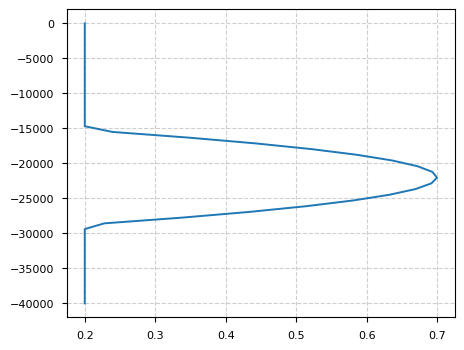

In [14]:
z0 = np.linspace(-40000,0,50)
ratio = 0.7-0.7*np.power(-z0/1000.0-22.0,2)/np.power(8.0,2)

ratio2 = np.where(ratio<0.2, 0.2,ratio)


plt.figure(figsize=(5,4))
plt.plot(ratio2, z0,'-')
plt.show()

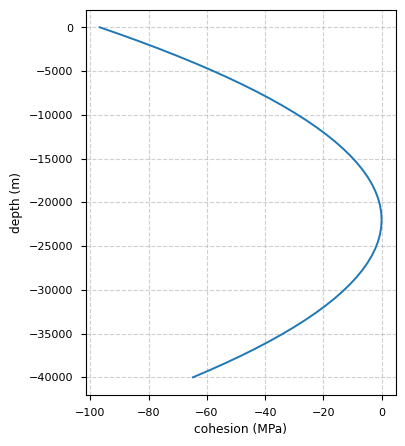

In [11]:
z0 = np.linspace(-40000,0,50)
coh = -20*np.power(-z0/1000.0-22.00,2)/np.power(10.0,2)


plt.figure(figsize=(4,5))
plt.plot(coh, z0,'-')
plt.xlabel('cohesion (MPa)')
plt.ylabel('depth (m)')
plt.show()

In [29]:
45.6 + 22.8 + 22.8 + 30.4 + 22.8 + 2.6

147.0

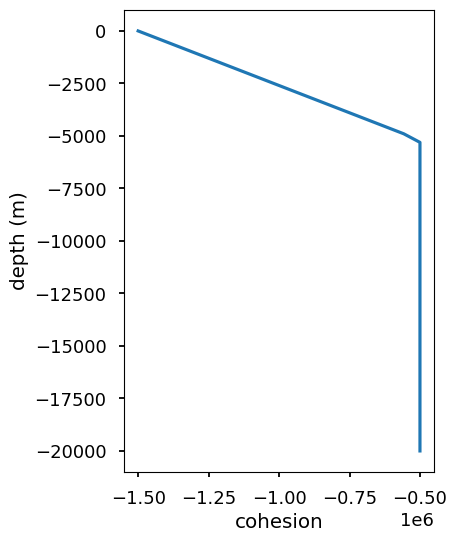

In [ ]:
z0 = np.linspace(-20000,0,50)

zIncreasingCohesion = 6000.0*np.sin(60/180*np.pi)
cohesion = -0.5e6
coh = z0-z0

for  ik, zd in enumerate(z0):
  coh[ik] = cohesion

  if (zd >= -zIncreasingCohesion):
    coh[ik] = cohesion - 1.0e6 * (zd + zIncreasingCohesion) / zIncreasingCohesion


plt.figure(figsize=(4,6))
plt.xlabel('cohesion')
plt.ylabel('depth (m)')
plt.plot(coh, z0,'-')
plt.show()

In [152]:
# testTP nucleation
y = -30000.0

z = -13000.0
x =  z / np.tan(15/180*np.pi)
print(x)

-48516.66049839541


In [156]:
z_n = -50000.0;

y_n = -30000.0;

zd = z_n*np.sin(15/180*np.pi)-20000.0
xd = z_n*np.cos(15/180*np.pi)
print(xd,y_n,zd)

-48296.29131445342 -30000.0 -32940.95225512604


In [145]:
# dip angle
dz = 10700
dl = np.sqrt((1639991.959994218-1605088.650438001)**2+(-1927680.2128316108+1851470.3181247758)**2+10700**2)

print(np.arcsin(dz/dl)*180/np.pi)

7.27451559340222
